HACK CRAFT

# *RESPONSIVE, ALGORITHMIC*:
## Improvisatory algorithmic composition.
## Composition 2, Materials notebook.
### Tyler Foster

In [164]:
import copy

import math
import numpy as np
import torch
import random

from tqdm import tqdm

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from midiutil import MIDIFile
from scipy.io.wavfile import write

In [165]:
class color:
    CYAN= '\033[96m'
    BLUE = '\033[94m'
    RED = '\033[31m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'
    
print(color.BOLD + color.BLUE + 'BOLD BLUE TEST' + color.END)

BOLD BLUE TEST


In [166]:
def Hz_to_semi(freq_1: float, freq_0: float):
    just_interval = freq_1/freq_0
    semi = 12 * math.log(just_interval, 2)
    return semi

def semi_dev(semitone_value: float):
    deviation = semitone_value - round(semitone_value)
    return deviation

def Hz_to_MIDI(frequency: float):
    semitone_interval_over_A4 = Hz_to_semi(frequency, 440)
    MIDI_number = int(69 + round(semitone_interval_over_A4))
    semitone_deviation = semi_dev(semitone_interval_over_A4)
    pitchwheel_value = int(semitone_deviation * 4096)
    return MIDI_number, pitchwheel_value

## 1. Structural premises.

### 1.1. Unified material.
Only two materials *period*:
1. **Material 1.** Fourier series with algorithmically generated coefficients, printed as `.wav` files.
2. **Material 2.** Shannon wavelet series with algorithmically generated coefficients, printed as `.wav` files.

### 1.2. Two-part voiceleading between the materials.
1. **Voice 1.** Material 1.
2. **Voice 2.** Material 2.

### 1.3. Only 3 compositional parameters, 2 controlled by hand.
1. **Compositional parameter 1.** Placement in DAW.
2. **Compositional parameter 2. (*by hand*).** Throw tempo automation to a dial on MIDI controller.
3. **Compositional parameter 2. (*by hand*).** Throw a single (correlated?) EQ parameter to a dial on MIDI controller.
I set the 3 compositional parameters separately for each voice.

### 1.4 [Three-part, forward focus scheme...]

### 1.5. Do trial piece with *simple* voices, focussing on time and full duration of sections.

### 1.6 In modal sections, make timbre transform across scale.
[...]

### 1.7. Comments.
**1.7.1. Comment.** In combination, premises 1.1, 1.2, and 1.3 above offer an interpretation of what it means to compose with attention to "what the material wants to do," alternative to the more computationally-intensive interpretation behind Composition 1 (previous notebook). Try to create an algorithmic composition that communicates the dance-based, musical gall that I sometimes muster on Jay's kit, the thing that gets people to declare my drumming to be "music."

**1.7.2. Comment.** One real challenge in composing this piece will be maintaining the kind of focus that won't wander off to new material around 0:30 sec. Focus instead on the what, in my drumming at Jay's, communicates "music."

*Example*: The trampoline kick-start trick I use to access full-body, dance-like movement right before I sit down to the kit.

**1.7.3. Comment.** Listen to a lot of *Richard Barrett*=, not to mimic, but to think about human performance within a relatively unified texture.
___

## 1.?? Voice leading and flatness.
### Lines transplanting one another along the pitch-, a.k.a. $\pmb{\widehat{\mathbb{R}}}$-axis.
I started asking myself what about my last piece made it sound flat. It's of course due to lots of things, but I settled on the hypothesis that a lot of the flatness comes from the way pitch-space works in the piece. Many of the individual voices in the piece are restricted to pretty narrow pitch-bands, and these pitch-bands don't really overlap, so the voices don't interact much in pitch-space. In more dynamic voice leading, the voice ranges overlap, allowing lines to displace one another. This leads to an interesting tension between two directives. On the one hand, we can try to make a texture more dynamic by writing lines where one voice moves into the pitch band occupied by another voice. On the other hand, traditional voice leading makes a concerted effort to avoid voice crossings. The reason the two directives don't contradict one another is because voices can displace one another. 

**Hypothesis/Model: Scales of harmonic movement.** *Hypothesis 1.* Simultaneous movement of lines restricted to non-overlapping lines will be percieved as movement, but bound by order-of-magnitude $b^{\omega(t)}$. *Hypothesis 2.* Movement of lines that transplant one another within their respective bands of local movement with create a perceived effect of harmonic movement some order of magnitude $b^{\varepsilon}$ higher, i.e., as order-of-magnitude $b^{\omega(t)+\varepsilon}$, for $\varepsilon>0$. *Hypothesis 3.* When $b^{\varepsilon}$ functions audibly as an *octave* within the voice leading texture, the increased effect of transplanting lines will feel one order-of-magnitude higher.

## 1.??? "Solved" versus "navigated".
[...]

**Question.** Could you navigate the Poincare product space $\mathbb{R}\!\times\!\widehat{\mathbb{R}}$ in *multi-graphs* of sums $\omega_{1}(t)+\omega_{2}(t)+\cdots+\omega_{m}(t)$.

## 2. Review of orthogonal wavelet bases.
My knowledge of orthogonal wavelet bases comes primarily from Chapter 7 of [*A Wavelet Tour of Signal Processing - Third Edition*](https://wavelet-tour.github.io/), by Stéphane Mallat. Need to write it in my own words to turn it into a composing tool.

### 2.1 Basic setup.
**2.1.1. The infinite-dimensional vector space of "all" audio signals.** We represent real time, measured in seconds, with the variable $t\in\mathbb{R}$, and we abstract *not necessarily periodic* audio signals as functions $f\in L^2(\mathbb{R})$. In other words, a *audio signal* is a measurable function $f:\mathbb{R}\longrightarrow\mathbb{R}$ such that $\int_{-\infty}^{\infty}|f(t)|^{2}dt$ is finite. Note that this setting already exhibits two fundamental differences from the standard setting in which Fourier series arise: (1) our domain $\mathbb{R}$ is non-compact (it is *locally compact*) as opposed to the compact domain $\mathbb{S}^{1}$ on which functions decompose into Fourier series, and (2) our functions on this domain take values in $\mathbb{R}$ rather than $\mathbb{C}$.

*Question.* Does any of the structure on $\mathbb{R}$ beyond its Lebesgue measure, such as its point $0\in\mathbb{R}$ or its topological group structure, play a critical role in its capacity as the domain for functions in $L^{2}(\mathbb{R})$?

We equip the $\mathbb{R}$-vector space $L^{2}(\mathbb{R})$ with the inner product $\langle-,-\rangle:L^2(\mathbb{R})\otimes_{\mathbb{R}}L^{2}(\mathbb{R})\longrightarrow\mathbb{R}$ that returns
$$
    \langle f,g\rangle\ =\int_{-\infty}^{\infty}\!\!f(t)\ g(t)\ dt.
    $$
The space $L^{2}(\mathbb{R})$ is complete with respect to the resulting norm
$$
    \left\Vert f\right\Vert:=\sqrt{\langle f, f\rangle},
    $$
implying that $L^{2}(\mathbb{R})$ is a Hilbert space. Thus $L^{2}(\mathbb{R})$ admits a countable, orthonormal topological basis.

**2.1.2. Remark.** If we were working with the Hilbert space $L^{2}(\mathbb{S}^{1})$ instead, the modes, i.e., sustained tones, on $\mathbb{S}^{1}$ would provide us with a topological basis with a natural musical interpretation. "Signals" in $L^{2}(\mathbb{S}^{1})$ abstract periodic tones; they do not come with any information about how they actually play in real time. When our domain is the non-compact space $\mathbb{R}$ representing *all musical time past and future*, modes become less meaningful, and we look for an orthonormal topological basis that reflects not sustained tones, but sound that is localized in time. The loose dichotomy here is:
- $\pmb{L^{2}(\mathbb{S}^{1})}$ — space of abstract periodic audio signals, for an unspecified fundamental frequency, i.e., for an unspecified tonic. The standard Hilbert basis for $L^{2}(\mathbb{S}^{1})$ amounts to the overtone series for the unspecified tonic. In this way, $L^{2}(\mathbb{S}^{1})$ provides a mathematical abstraction of tonal musical material, broadly understood.
- $\pmb{L^{2}(\mathbb{R})}$ — space of audio signals playing in real time. We can think of $L^{2}(\mathbb{R})$ as providing an abstract setting for atonal musical material. Measurable functions in with compact support lie in $L^{2}(\mathbb{R})$, and, to my mind, provide a more "percussive" picture of audio signals.

## 2.2. Multiresolution approximation via wavelets.
**2.2.1. Sequences of resolution operators.** Fix a function $d_{(-)}:\mathbb{Z}\longrightarrow\mathbb{Z}_{\ge 2}$, interpreted as a doubly-infinite sequence of integers
$$
    \dots,\ d_{-3},\ d_{-2},\ d_{-1},\ d_{0},\ d_{1},\ d_{2},\ d_{3},\ \dots,
    $$
such that $d_{i}\ge 2$ for all $i$. We refer to this sequence as our *resolution sequence*, and we call each value $d_i$ in it a *resolution*. Each integer $d$ in this sequence induces a pair of inverse scaling maps of our time domain $\mathbb{R}$:
$$
    \text{mult}_{d}:\mathbb{R}\longrightarrow\mathbb{R}
    \ \ \ \ \ \ \text{taking}\ \ \ \ \ \ 
    t\mapsto d\!\cdot\!t,
    $$
and
$$
    \text{mult}_{1/d}:\mathbb{R}\longrightarrow\mathbb{R}
    \ \ \ \ \ \ \text{taking}\ \ \ \ \ \ 
    t\mapsto \tfrac{1}{d}\!\cdot\!t.
    $$
In turn, these induce a pair of contravariant domain-scaling, linear operators
$$
    \text{mult}_{d}^{\ast}:L^{2}(\mathbb{R})\longrightarrow L^{2}(\mathbb{R})
    \ \ \ \ \ \ \text{taking}\ \ \ \ \ \ 
    f(t)\mapsto f(d\!\cdot\!t),
    $$
and
$$
    \text{mult}_{1/d}^{\ast}:L^{2}(\mathbb{R})\longrightarrow L^{2}(\mathbb{R})
    \ \ \ \ \ \ \text{taking}\ \ \ \ \ \ 
    f(t)\mapsto f\big(\tfrac{1}{d}\!\cdot\!t\big).
    $$

Observe that for any non-zero scalar $c$, we have
$$
    \big\langle f(ct),\ g(ct)\big\rangle
    \ =\ 
    \int_{-\infty}^{\infty}\!\!f(ct)\ g(ct)\ dt
    \ =\ 
    \int_{-\infty}^{\infty}\!\!f(s)\ g(s)\ d\frac{s}{c}
    \ =\ 
    \frac{1}{c}\!\cdot\!\big\langle f(ct),\ g(ct)\big\rangle.
    $$
Thus for each integer $d_{i}$ in our resolution sequence, the modified linear transformations
$$
    \text{scal}_{i}\ :=\ \frac{1}{\sqrt{d_{i}}}\!\cdot\!\text{mult}^{\ast}_{1/d_{i}}
    \ \ \ \ \ \ \text{and}\ \ \ \ \ \ 
    \text{scal}^{-1}_{i}\ :=\ \sqrt{d_{i}}\!\cdot\!\text{mult}^{\ast}_{d}
    $$
become inverse unitary operators of $L^{2}(\mathbb{R})$.

We fix a positive real number $\Delta_{0}\in\mathbb{R}_{>0}$, which we call our *fundamental duration*. Its inverse $\lambda:=1/\Delta_{0}$ will behave *a little bit like* a fundamental frequency, a.k.a. a tonic, in our multiresolution approximations. This will become apparent below. For each index $i\in\mathbb{Z}$, we obtain a new duration
$$
    \Delta_{i}
    \ :=\ 
    \left\{
    \begin{array}{ccl}
    \left(\prod_{j=1}^{i}d_{j}\right)\!\cdot\!\Delta_{0} & \!\!\!\!\text{if}\!\! & i\ge 1,
    \\
    \left(\prod_{j=i+1}^{0}\frac{1}{d_{j}}\right)\!\cdot\!\Delta_{0} & \!\!\!\!\text{if}\!\! & i\le -1.
    \end{array}
    \right.
    $$
Note that we exclude the case $i=0$ here, so as to leave $\Delta_{0}$ unmodified. Form this formula, we obtain
$$
    \Delta_{i+1}\ =\ d_{i+1}\!\cdot\!\Delta_{i}
    \ \ \ \text{for all}\ i\in\mathbb{Z}.
    $$
In other words, we have the projective sequence of durations
$$
    \cdots\xrightarrow{\cdot\ d_{-2}}\Delta_{-2}\xrightarrow{\cdot\ d_{-1}}\Delta_{-1}\xrightarrow{\cdot\ d_{0}}\Delta_{0}\xrightarrow{\cdot\ d_{1}}\Delta_{1}\xrightarrow{\cdot\ d_{2}}\Delta_{2}\xrightarrow{\cdot\ d_{3}}\cdots
    $$

For each index $i\in\mathbb{Z}$, we have an inverse pair of translation maps $\pm\Delta_{i}:\mathbb{R}\longrightarrow\mathbb{R}$ taking $t\mapsto t\pm\Delta_{i}$, that induce a pair of inverse unitary operators
$$
    \text{trns}^{\pm 1}_{i}:L^{2}(\mathbb{R})\longrightarrow L^{2}(\mathbb{R})
    \ \ \ \ \ \ \text{taking}\ \ \ \ \ \ 
    f(t)\mapsto f(t\pm\Delta_{i}).
    $$

Minding co- versus contra-variance, the simple instance of distributivity
$$
    \tfrac{1}{d_{i}}t+\Delta_{i-1}
    \ =\ 
    \tfrac{1}{d_{i}}t+\tfrac{1}{d_{i}}\Delta_{i}
    \ =\ 
    \tfrac{1}{d_{i}}(t+\Delta_{i})
    $$ 
implies that these scale and translation operators interact according to
$$
    \text{scal}_{i}\circ\text{trns}_{i-1}
    \ =\ 
    \text{trns}_{i}\circ\text{scal}_{i}.
    $$

**2.2.2. A musical interpretation involving co- versus contra-variance, scaling, and translation.** Fix some function $f\in L^{2}(\mathbb{R})$. Let $\Gamma_{\!f}$ denote the *graph* of $f$ in $\mathbb{R}\!\times\!\mathbb{R}$, defined as
$$
    \Gamma_{\!f}
    \ :=\ 
    \big\{
    (t,\ \lambda)\in\mathbb{R}\!\times\!\mathbb{R}:\lambda=f(t)
    \big\}.
    $$
Fix a nonzero, postive scalar $c\in\mathbb{R}_{>0}$. We can dilate the graph $\Gamma_{\!f}$ along *just its $t$-axis*, replacing each point $(t,\lambda)\in\Gamma_{\!f}$ with the point $(ct,\lambda)$. Since $\lambda=f(t)$, we can rewrite this point as $\big(s,f(\tfrac{1}{c}s)\big)$. Thus the function that dilates the graph of $f$ by the factor $c$ along the $t$-axis coincides with the linear operator $\text{mult}^{\ast}_{1/c}:L^{2}(\mathbb{R})\longrightarrow L^{2}(\mathbb{R})$.

This means that for each $i\in\mathbb{Z}$, we can think of the unitary operator $\text{scal}_{i}:L^{2}(\mathbb{R})\longrightarrow L^{2}(\mathbb{R})$ pictorially as an operation that dilates a spectrogram out in the horizontal, time-direction by a factor of $d_{i}$. The duration $\Delta_{i}$

[translation...]

**2.2.4. Definition.** A $(d_{\bullet})$-*multiresolution approximation* on $L^{2}(\mathbb{R})$ is a decreasing $\mathbb{R}$-linear filtration
$$
    \cdots\ \supset\ V_{-2}\ \supset\ V_{-1}\ \supset\ V_{0}\ \supset\ V_{1}\ \supset\ V_{2}\ \supset\ \cdots
    $$
in $L^{2}(\mathbb{R})$, such that:
1. Each subspace $V_{i}$ is closed in $L^{2}(\mathbb{R})$.
2. Each subspace $V_{i}$ is $\text{trns}^{\pm1}_{i}$-invariant.
3. Each unitary operator $\text{scal}_{i}$ restircts to an isomorphism $\text{scal}_{i+1}:V_{i}\xrightarrow{\sim}V_{i+1}$.
4. The filtration is *separated*, meaning that $\bigcap_{i\in\mathbb{Z}}V_{i}=\{0\}$.
5. The filtration is *topologically exhaustive*, meaning that $\overline{\ \bigcup_{i\in\mathbb{Z}}V_{i}\ }=L^{2}(\mathbb{R})$.
6. The vector space $V_0$ admits a function $\theta\in V_{i}$ such that the resulting subset $\{\text{trns}^{n}_{0}\theta\}_{n\in\mathbb{Z}}\subset V_{0}$ is a [*Riesz basis*](https://en.wikipedia.org/wiki/Riesz_sequence) for $V_{0}$.

**2.2.3. Counterexample.** Fix a function $f\in L^2(\mathbb{R})$, fix a fundamental duration $\Delta_{0}$, and fix a resolution sequence $(d_{i})_{i\in\mathbb{Z}}$. Define
$$
    V_{0}
    \ :=\ 
    \overline{\ \sum_{n\in\mathbb{Z}}\mathbb{R}\ \text{trns}^{n}_{0}(f)\ },
    $$
and consider the $\mathbb{Z}$-indexed family of subspaces $V_{i}\subset L^{2}(\mathbb{R})$ defined inductively as
$$
    V_{i+1}
    \ :=\ 
    \text{scal}_{i+1}(V_{i})
    \ \ \ \text{for}\ \ \ i\in\mathbb{Z}_{\ge0}
    \ \ \ \ \ \ \text{and}\ \ \ \ \ \ \ 
    V_{i-1}
    \ :=\ 
    \text{scal}^{-1}_{i}(V_{i})
    \ \ \ \text{for}\ \ \ i\in\mathbb{Z}_{\le0}.
    $$
Because each scaling operator $\text{scal}_{i}$ is unitary, each subspace $V_{i}$ is closed in $L^{2}(\mathbb{R})$. Because we construct the subspace $V_{0}$ to be $\text{trns}_{0}$-invariant, the identity $\text{scal}_{i}\circ\text{trns}_{i-1}=\text{trns}_{i}\circ\text{scal}_{i}$ implies that for each $i\in\mathbb{Z}$, the subspaces $V_{i}$ is $\text{trns}_{i}$-invariant.

**[...]**

## 2.3. Tonal voice.
### 2.3.1. Voiceleading conditions via physical conditions.

In [167]:
tonic = 100 # in Hz

# we copy the tonic to a pitch we can manipulate
pitch = copy.deepcopy(tonic)

# step interval for our scale
base_interval = 3/2

# initially, our scale contains only the tonic
scale = [tonic]
# we proceed by interval steps, appending each new pitch to our scale...
for n in range(100):
    pitch = base_interval * pitch
    # ...stopping just short of 20 kHz
    if pitch < 2e4:
        scale.append(pitch)

print(color.BOLD + color.BLUE + "Underlying scale (in Hz):" + color.END, scale)

Underlying scale (in Hz): [100, 150.0, 225.0, 337.5, 506.25, 759.375, 1139.0625, 1708.59375, 2562.890625, 3844.3359375, 5766.50390625, 8649.755859375, 12974.6337890625, 19461.95068359375]


In [168]:
masses = [10, 10, 5, 10, 10]
print('\n', masses,'\n')

# begin a "chord dictionary" [...]
chord_dict = {}

# add the openning chord to the chord dictionary
for i in range(len(masses)):
    key = i
    mass = masses[key]
    position = i
    interval = (base_interval)**i
    velocity = 0
    acceleration = 0
    chord_dict.update({key: { 0 : [interval * 100, position, velocity, acceleration, mass]}})

# at the moment of the opening chord, "fire" its pitch 7 off in the upward direction
chord_dict.update({1: { 0: [((base_interval)**1) * 100, # underlying pitch
                            1, # base-3/2 logarithmic pitch position
                            3, # velocity
                            0, # acceleration
                            mass # mass
                           ]}})

chord_dict.update({3: { 0: [((base_interval)**3) * 100, # underlying pitch
                            3, # base-3/2 logarithmic pitch position
                            1, # velocity
                            0, # acceleration
                            mass # mass
                           ]}})

print(chord_dict)


 [10, 10, 5, 10, 10] 

{0: {0: [100.0, 0, 0, 0, 10]}, 1: {0: [150.0, 1, 3, 0, 10]}, 2: {0: [225.0, 2, 0, 0, 5]}, 3: {0: [337.5, 3, 1, 0, 10]}, 4: {0: [506.25, 4, 0, 0, 10]}}


In [169]:
time_step = 0.005

step_count = 4800

for k in tqdm(range(1, step_count)):
    time = k * time_step
    for key in chord_dict:
        previous_position = chord_dict[key][k-1][1]
        previous_velocity = chord_dict[key][k-1][2]
        previous_acceleration = chord_dict[key][k-1][3]
        mass = chord_dict[key][k-1][4]
        
        if key == 0 or key == len(masses)-1:
            new_position = previous_position
        else:
            new_position = previous_position + previous_velocity * time_step
        new_pitch = ((base_interval)**new_position) * 100
        new_velocity = 0.99849 * (previous_velocity + previous_acceleration * time_step)

        total_force = 0
        for j in range(len(masses)):
            if j == key:
                pass
            else:
                other_mass = masses[j]
                distance = previous_position - chord_dict[j][k-1][1]
                sign = np.sign(distance)
                force = mass * other_mass * 0.5 * (sign/(distance**2))
                total_force = total_force + force
        new_acceleration = total_force/mass

        chord_dict[key].update({k: [new_pitch, new_position, new_velocity, new_acceleration, mass]})


score = []
for k in tqdm(range(1, step_count)):
    chord = []
    for key in chord_dict:
        pitch = chord_dict[key][k][1]
        chord.append(pitch)
    score.append(chord)
    
velocity_score = []
for k in tqdm(range(1, step_count)):
    chord = []
    for key in chord_dict:
        velocity = chord_dict[key][k][2]
        chord.append(velocity)
    velocity_score.append(chord)

100%|██████████| 4799/4799 [00:00<00:00, 523116.19it/s]


In [170]:
score_max = 0
score_min = 0
for chord in velocity_score:
    maximum = max(chord)
    score_max = max(maximum, score_max)
    minimum = min(chord)
    score_min = max(minimum, score_min)

print(max(score_max, abs(score_min)))

27.105240806160666


In [171]:
t = np.linspace(0, 2 * np.pi, 20)
print(type(t))

<class 'numpy.ndarray'>


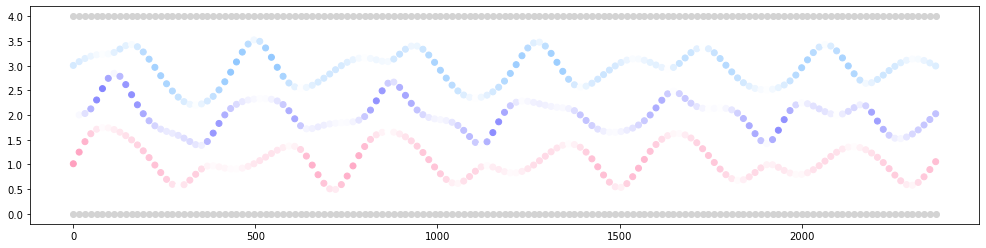

In [172]:
X = [16 * i for i in range(150-1)]

f = plt.figure()
f.set_figwidth(17)
f.set_figheight(4)

for k in range(len(masses)):
    if k == 0 or k == len(masses)-1:
        color = 'lightgray'
    elif k == 1:
        color = [(1, 1-abs(velocity_score[x][k])/8, 1-abs(velocity_score[x][k])/12) for x in X]
    elif k == 2:
        color = [( 1-abs(velocity_score[x][k])/6,  1-abs(velocity_score[x][k])/6, 1) for x in X]
    elif k == 3:
        color = [(1-abs(velocity_score[x][k])/6,  1-abs(velocity_score[x][k])/12, 1) for x in X]
    Y = [score[x][k] for x in X]
    plt.scatter(X, Y, c=color)

plt.show()

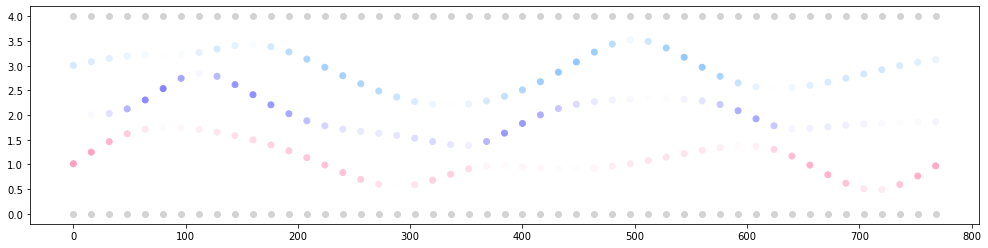

In [173]:
X = [16 * i for i in range(50-1)]

f = plt.figure()
f.set_figwidth(17)
f.set_figheight(4)

for k in range(len(masses)):
    if k == 0 or k == len(masses)-1:
        color = 'lightgray'
    elif k == 1:
        color = [(1, 1-abs(velocity_score[x][k])/8, 1-abs(velocity_score[x][k])/12) for x in X]
    elif k == 2:
        color = [( 1-abs(velocity_score[x][k])/6,  1-abs(velocity_score[x][k])/6, 1) for x in X]
    elif k == 3:
        color = [(1-abs(velocity_score[x][k])/6,  1-abs(velocity_score[x][k])/12, 1) for x in X]
    Y = [score[x][k] for x in X]
    plt.scatter(X, Y, c=color)

plt.show()

In [174]:
indices = [16 * i for i in range(150-1)]

new_score = []
for i in indices:
    positions = score[i]
    velocities = velocity_score[i]
    zipped = zip(positions, velocities)
    pairs = []
    for item in zipped:
        pairs.append(item)
    new_score.append(copy.deepcopy(pairs))
    
print(len(new_score))

149


In [175]:
max_velocity = 0
min_velocity = 0
for chord in new_score:
    for pair in chord:
        velocity = pair[1]
        max_velocity = max(velocity, max_velocity)
        min_velocity = min(velocity, min_velocity)

print(max_velocity)
print(min_velocity)
print(max_velocity-min_velocity)

24.87159763971293
-25.354299777931598
50.22589741764453


In [176]:
newer_score = []
for chord in new_score:
    new_chord = []
    for pair in chord:
        position = pair[0]
        
        velocity = pair[1]
        velocity = abs(velocity)
        velocity = velocity/max(max_velocity, abs(min_velocity))
        new_pair = (position, velocity)
        new_chord.append(new_pair)
    newer_score.append(new_chord)

In [177]:
tonic = 180
interval = 3/2

MIDI_score = []
for chord in newer_score:
    MIDI_chord = []
    for pair in chord:
        position = pair[0]
        frequency = tonic * (interval)**position
        MIDI_note, MIDI_wheel = Hz_to_MIDI(frequency)
        
        velocity = pair[1]
        MIDI_velocity = int(250 * velocity)
        
        MIDI_triple = (MIDI_note,
                       MIDI_wheel,
                       MIDI_velocity)
        
        MIDI_chord.append(MIDI_triple)
    MIDI_score.append(MIDI_chord)

In [178]:
parts = []
for k in range(len(masses)):
    part = []
    for chord in MIDI_score:
        MIDI_triple = chord[k]
        part.append(MIDI_triple)
    parts.append(part)

In [179]:
class color:
    CYAN= '\033[96m'
    BLUE = '\033[94m'
    RED = '\033[31m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'
    
print(color.BOLD + color.BLUE + 'BOLD BLUE TEST' + color.END)

BOLD BLUE TEST


**REMEMBER TO CHANGE `track_name`!!!** **REMEMBER TO CHANGE `track_name`!!!** **REMEMBER TO CHANGE `track_name`!!!**

**REMEMBER TO CHANGE `track_name`!!!** **REMEMBER TO CHANGE `track_name`!!!** **REMEMBER TO CHANGE `track_name`!!!**

**REMEMBER TO CHANGE `track_name`!!!** **REMEMBER TO CHANGE `track_name`!!!** **REMEMBER TO CHANGE `track_name`!!!**

In [17]:
base_duration = 2 * 0.25
note_duration = 4

part_number = 0
for part in parts:
    track_name = 'ODEVoiceLeading_part{}_F'.format(part_number)

    globals()[track_name] = MIDIFile(numTracks = 1,
                                     removeDuplicates = False,
                                     deinterleave = True,
                                     adjust_origin = False,
                                     file_format = 1,
                                     ticks_per_quarternote = 960,
                                     eventtime_is_ticks = False)

    globals()[track_name].addNote(track = 0,
                                  channel = 1,
                                  pitch = 69,
                                  time = 0,
                                  duration = 0.5,
                                  volume = 50)

    note_count = 0
    for MIDI_triple in part:
        MIDI_note, pitchwheel_value, velocity = MIDI_triple
        onset_time = note_count * base_duration
        duration = max((0.15-(velocity/250)), 0.001) * note_duration

        if velocity == 0:
            pass
        else:
            globals()[track_name].addNote(track = 0,
                                          channel = 1,
                                          pitch = MIDI_note,
                                          time = onset_time,
                                          duration = duration,
                                          volume = velocity)
            
            globals()[track_name].addPitchWheelEvent(track = 0,
                                                     channel = 1,
                                                     time = onset_time,
                                                     pitchWheelValue = pitchwheel_value)
            
            note_count = note_count + 1

    with open('{}.midi'.format(track_name), 'wb') as output_file:
        globals()[track_name].writeFile(output_file)

    print(color.BOLD + color.BLUE + '\nMIDI file saved as:' + color.END, '{}.midi'.format(track_name))
    
    part_number = part_number + 1


MIDI file saved as: ODEVoiceLeading_part0_F.midi

MIDI file saved as: ODEVoiceLeading_part1_F.midi

MIDI file saved as: ODEVoiceLeading_part2_F.midi

MIDI file saved as: ODEVoiceLeading_part3_F.midi

MIDI file saved as: ODEVoiceLeading_part4_F.midi


**Comments.** The resulting [*voiceleading_trial001.wav*](https://drive.google.com/file/d/1WObeCuWBZOLgkTNG_sDLcOUKsn04AY6h/view?usp=sharing) is pretty interesting, especially in the second half, where I start to give distinct lines distinct time resolutions. I want to try this with note duration correlated with the velocity of the corresponding point mass in the model.

### 2.3.2. Same, but duration coupled with physical velocity.
I'm going to just rebuild this thing.

#### 2.3.2.1. Clearly explain what it has to do with voice leading.
**What it's not.**
- It's *not* a study in notation or visualization. I study scores of the material, in the form of a spectogram-like images, to get a better understanding of parameters appearing in code I write, but the goal is musical. When I study the scores, I'm audiating and thinking about the parameters' relationships to musical goals [need to replace "goal" and "goals" with something more like ].

**What it is.** 
We have an interesting tension between two directives. On the one hand, we can try to make a texture more dynamic by writing lines where one voice moves into the pitch band occupied by another voice. On the other hand, traditional voice leading makes a concerted effort to avoid voice crossings. The reason the two directives don't contradict one another is because voices can displace one another. A physical system with similar properties occurs with magnetic beads strung along a taut string. If all the beads are positively charged, say, then flicking one of the beads will trigger a chaotic dance where any one bead displaces any other bead that it approaches. So I modelled this physical system, using 4 beads, and giving each bead a different mass. Interpreting "the wire" as the vertical dimension of a score, this creates a strange kind of atonal voice leading where voices displace one another without crossing and with very little parallel motion (see the two attached jpegs). By coupling note velocity and duration with "bead velocity" (in the physical sense), I obtained voice leading textures that exhibit a lot of the features of traditional voice leading, but without any tonality. Because the lines move quite freely in pitch space, they aren't 12-TET or just-intoned. The two wav files linked to below exhibit my most successful results. I still need to push it a long way to get it where I want it, so that I can use it as material in a larger piece I have in mind. Ultimately, they won't be MIDI.



Time is measured in *beats*. This gives us the potential to make the output time independent — for instance for MIDI output — so that we can adjust the tempo in a DAW.

The voice leading is modelled as the time evolution of a physical system, via Euler's Method. We fix the time-step size $\Delta t$ for our implementation of Euler's Method to be
$$
\Delta t = 10^{-3}\ \text{beats}.
$$

In [180]:
base_duration = 1/(2**3 * 5**3)
print(color.BOLD + color.BLUE + 'Base duration:' + color.END, base_duration, 'beats.')

Base duration: 0.001 beats.


Each state of the physical system is given as an instance of the `State` class below. Each instance of the `State` class is meant to represent the state of a system of $N$ particle at a given time. In mathematical notation, each instance of the state class is determined by the following datum:
1. A time $t$, the time coordinate of our state.
2. A tuple $(m_{1}, m_{2}, \dots, m_{N})$ of the masses of the $N$ particles in our system.
3. A tuple $(\mathbf{r}_{1}, \mathbf{r}_{2}, \dots, \mathbf{r}_{i}, \dots, \mathbf{r}_{N})$ of the coordinates of the particles in our system at time $t$.
4. A tuple $(\mathbf{v}_{1}, \mathbf{v}_{2}, \dots, \mathbf{v}_{i}, \dots \mathbf{v}_{N})$ of the velocities of the particles in our system at time $t$.
5. A subset of indices $1\le i_{1}< i_{2}< \dots < i_{M} \le N$ indicating which of the $N$ particles are *fixed*, meaning that these the positions of these particles do not change under time evolution.

The `State` class also comes with a method called `time_step` that lets the user specify a *time step size* $\Delta t$, a *force field* function $\mathbf{F}$, a *field strength coefficient*, and a *friction coefficient* to generate the new state of the system at time $t+\Delta t$. The differential equation we use for time evolution here is Newton's
$$
\mathbf{F}
\ =\ 
m\ \mathbf{a}.
$$
In terms of the `State` class, we can think of this as being a pair of differential equations for each index $1\le i\le N$:
$$
\frac{d}{dt}\mathbf{v}_{i}
\ =\ 
\frac{1}{m}\mathbf{F}_{i}
\ \ \ \ \ \ \ \ \text{and}\ \ \ \ \ \ \ \ 
\frac{d}{dt}\mathbf{r}_{i}
\ =\ 
\mathbf{v}_{i}.
$$

In [181]:
class State():
    def __init__(self,
                 time: float,
                 masses: list,
                 positions: list,
                 velocities: list,
                 accelerations: list,
                 fixed: list):
        
        assert type(time) == float
        assert type(masses) == list
        assert type(positions) == list
        assert type(velocities) == list
        assert type(accelerations) == list
        assert len(masses) == len(positions) == len(velocities)
        
        for m in masses:
            assert m != 0
            
        for i in fixed:
            assert type(i) == int
            assert i >= 0 and i <= len(masses)-1
            
        self.count = len(masses)
        self.time = time
        self.masses = masses
        self.positions = positions
        self.velocities = velocities
        self.accelerations = accelerations
        self.fixed = fixed

        
    def time_step(self, duration, force_field, field_strength, friction):
        field = force_field(self.positions, self.masses, field_strength)
        
        new_accelerations = []
        for i in range(self.count):
            force = field[i]
            mass = self.masses[i]
            new_accelerations.append(copy.deepcopy(force/mass))
        
        new_velocities = []
        for i in range(len(self.velocities)):
            velocity = self.velocities[i]
            acceleration = new_accelerations[i]
            if i in self.fixed:
                new_velocity = friction * velocity
            else:    
                new_velocity = friction * velocity + acceleration * duration
            new_velocities.append(new_velocity)
        
        new_positions = []
        for i in range(len(self.velocities)):
            position = self.positions[i]
            velocity = self.velocities[i]
            if i in self.fixed:
                new_position = position
            else:
                new_position = position + velocity * duration
            new_positions.append(copy.deepcopy(new_position))
            
        new_time = self.time + duration
        
        new_state = State(new_time,
                          self.masses,
                          new_positions,
                          new_velocities,
                          new_accelerations,
                          self.fixed)
        
        return new_state

[...]
$$
\mathbf{F}_{ij}
\ =\ 
\frac{m_{i}m_{j}}{|\mathbf{r}_{i}-\mathbf{r}_{j}|^2}\ \mathbf{u}_{ij}
\ =\ 
\frac{m_{i}m_{j}}{|\mathbf{r}_{i}-\mathbf{r}_{j}|}\ (\mathbf{r}_{i}-\mathbf{r}_{j})
$$
[...]
$$
\mathbf{F}_{i}
\ =\ 
\sum_{j=1}^{N}\mathbf{F}_{ij}
\ =\ 
m_{i}\sum_{j=1}^{N}m_{j}\ \frac{\mathbf{r}_{i}-\mathbf{r}_{j}}{|\mathbf{r}_{i}-\mathbf{r}_{j}|}
$$

In [182]:
def vector_field(position_list,
          mass_list,
          field_strength):
    forces = []
    for i in range(len(position_list)):
        this_position = position_list[i]
        this_mass = mass_list[i]
        total_force = 0
        for j in range(len(position_list)):
            if j == i:
                pass
            else:
                that_position = position_list[j]
                that_mass = mass_list[j]
                difference = this_position - that_position
                field_value = this_mass * that_mass * field_strength * np.sign(difference)/(difference**2)
                total_force = total_force + field_value
        forces.append(copy.deepcopy(total_force))
    
    return forces

The following cell uses `matplotlib` to print out "*voice leading scores*," which are really just $pitch\times\text{time}$-depictions of the evolution of the physical system. In these visualizations, we already provide a visual indication that physical velocity and amplitude should be coupled, by increasing the tone of each line whenever the corresponding particle is travelling at a higher speed.

In [183]:
def voice_leading(starting_velocities, point_masses):
    number_of_steps = 8000

    factors = []
    for i in range(4):
        for j in range(4):
            factors.append(2**i * 5**j)

    factors.sort()

    durations = [1/divisor for divisor in factors]
    durations.sort()

    step_duration = durations[0]

    initial_state = State(time = 0.0,
                          masses = point_masses,
                          positions = [0,1,2,3,4,5],
                          velocities = starting_velocities,
                          accelerations = [.0, .0, .0, .0, .0, .0],
                          fixed = [0, 5])

    state_list = [initial_state]
    for i in range(number_of_steps):
        state = state_list[i]
        new_state = state.time_step(duration = step_duration,
                                    force_field = vector_field,
                                    field_strength = .8,
                                    friction = .999)
        state_list.append(copy.deepcopy(new_state))

    position_evol = []
    for state in state_list:
        positions = state.positions
        #velocities = state.velocities
        position_evol.append([copy.deepcopy(positions),
                              #copy.deepcopy(velocities)
                             ])

    individual_evols = []
    for k in range(6):
        this_evol = []
        for positions in position_evol:
            position = positions[0][k]
            this_evol.append(copy.deepcopy(position))
        individual_evols.append(copy.deepcopy(this_evol))
        
    velocity_evol = []
    for state in state_list:
        velocities = state.velocities
        #velocities = state.velocities
        velocity_evol.append([copy.deepcopy(velocities)])
        
    max_velocity = max([max([abs(velocity) for velocity in state.velocities]) for state in state_list])
        
    individual_velocities = []
    for k in range(6):
        this_evol = []
        for velocities in velocity_evol:
            #if max_velocity != .0:
            #     velocities[0][k] = velocities[0][k]/max_velocity
            velocity = velocities[0][k]
            this_evol.append(copy.deepcopy(velocity))
        individual_velocities.append(copy.deepcopy(this_evol))
        
    acceleration_evol = []
    for state in state_list:
        accelerations = state.accelerations
        acceleration_evol.append([copy.deepcopy(accelerations)])
        
    max_accel = max([max([abs(acceleration) for acceleration in state.accelerations]) for state in state_list])
        
    individual_accelerations = []
    for k in range(6):
        this_evol = []
        for accelerations in acceleration_evol:
            if max_accel != .0:
                 accelerations[0][k] = accelerations[0][k]/max_accel
            acceleration = accelerations[0][k]
            this_evol.append(copy.deepcopy(acceleration))
        individual_accelerations.append(copy.deepcopy(this_evol))
        
    for state in state_list:
        accelerations = state.accelerations
        acceleration_evol.append([copy.deepcopy(accelerations)])


    X = [i for i in range(number_of_steps+1)]

    f = plt.figure()
    f.set_figwidth(17)
    f.set_figheight(8)
    
    for k in range(len(point_masses)):
        if k == 0 or k == len(point_masses)-1:
            color = 'lightgray'
            sizes = [2 for x in X]
        elif k == 1:
            color = [(0.925-abs(velocity_evol[x][0][k])/12,  0.925-abs(velocity_evol[x][0][k])/8, 0.925-abs(velocity_evol[x][0][k])/8) for x in X]
            sizes = [84 * abs(velocity_evol[x][0][k]/max_velocity)**(2.25) for x in X]
        elif k == 2:
            color = [(0.925, 0.925-abs(velocity_evol[x][0][k])/9, 0.925-abs(velocity_evol[x][0][k])/14) for x in X]
            sizes = [84 * abs(velocity_evol[x][0][k]/max_velocity)**(2.25) for x in X]
        elif k == 3:
            color = [( 0.925-abs(velocity_evol[x][0][k])/16,  0.925-abs(velocity_evol[x][0][k])/9, 0.925) for x in X]
            sizes = [84 * abs(velocity_evol[x][0][k]/max_velocity)**(2.25) for x in X]
        elif k == 4:
            color = [(0.925-abs(velocity_evol[x][0][k])/9,  0.925-abs(velocity_evol[x][0][k])/14, 0.925) for x in X]
            sizes = [84 * abs(velocity_evol[x][0][k]/max_velocity)**(2.25) for x in X]
        Y = individual_evols[k]
        plt.scatter(X, Y, sizes, c=color)
        
    for k in range(len(point_masses)):
        if k == 0 or k == len(point_masses)-1:
            color = 'gray'
            sizes = [2 for x in X]
        elif k == 1:
            color = ['darkblue' for x in X]
            sizes = [84.5 * abs(acceleration_evol[x][0][k])**(3.25) for x in X]
        elif k == 2:
            color = ['orange' for x in X]
            sizes = [84.5 * abs(acceleration_evol[x][0][k])**(3.25) for x in X]
        elif k == 3:
            color = ['red' for x in X]
            sizes = [84.5 * abs(acceleration_evol[x][0][k])**(3.25) for x in X]
        elif k == 4:
            color = ['aqua' for x in X]
            sizes = [84.5 * abs(acceleration_evol[x][0][k])**(3.25) for x in X]
        Y = individual_evols[k]
        plt.scatter(X, Y, s=sizes, c=color)

#    for k in range(6):
#        plt.scatter(X, individual_evols[k])
    plt.axis('off')
    plt.show()
    
    return individual_evols, individual_velocities, individual_accelerations

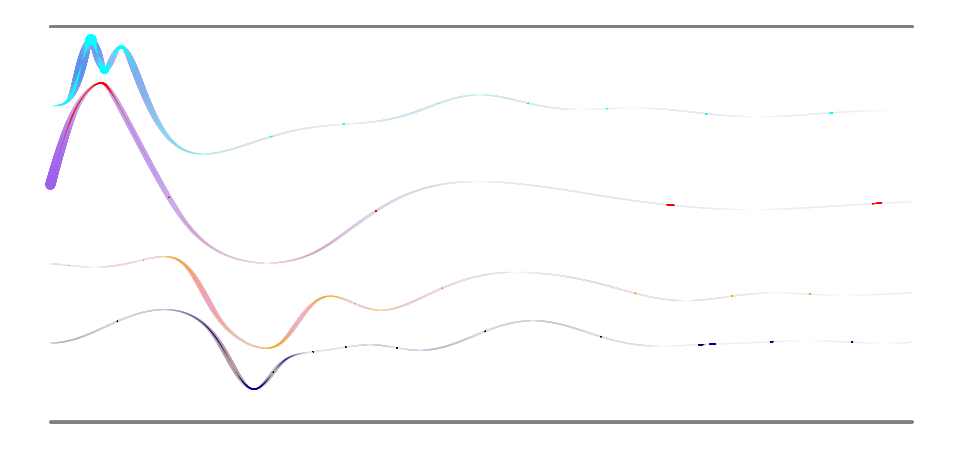

In [184]:
P, Q, R = voice_leading([0, 0, 0, 5, 0, 0], [5, 1, 1, 5, 1, 5])

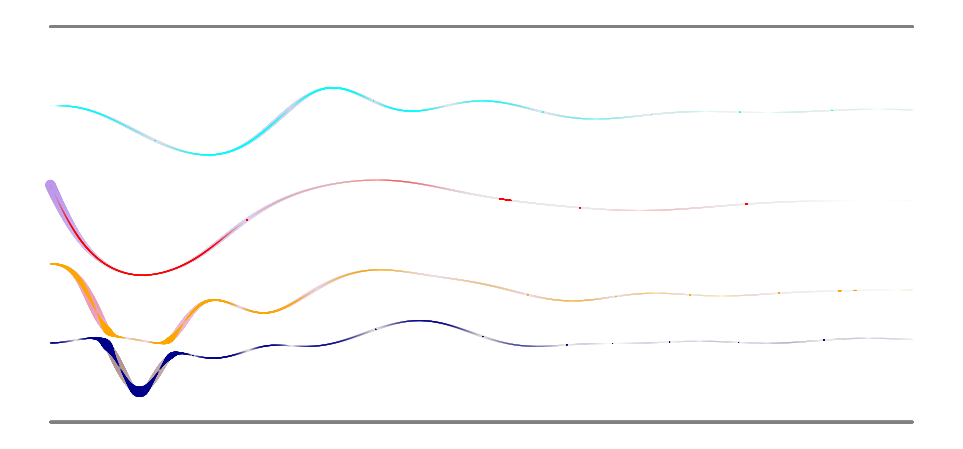

In [185]:
P, Q, R = voice_leading([0, 0, 0, -3, 0, 0], [5, 1, 1, 5, 1, 5])

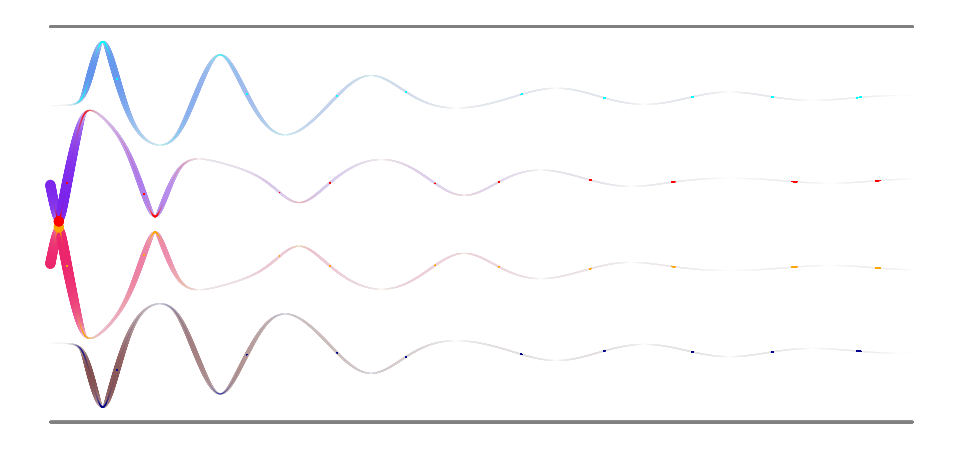

In [186]:
P, Q, R = voice_leading([0, 0, 7, -7, 0, 0], [5, 5, 5, 5, 5, 5])

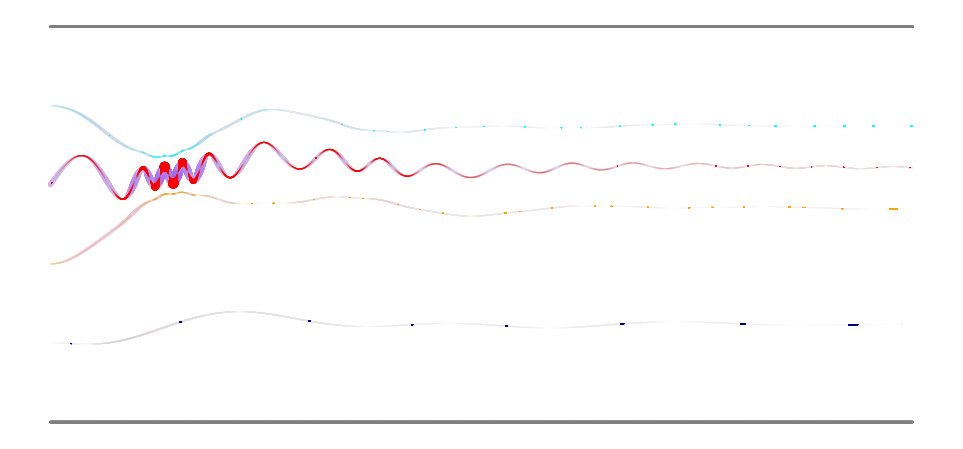

In [187]:
P, Q, R = voice_leading([0, 0, 0, 2, 0, 0], [5, 5, 5, -0.7, 5, 5])

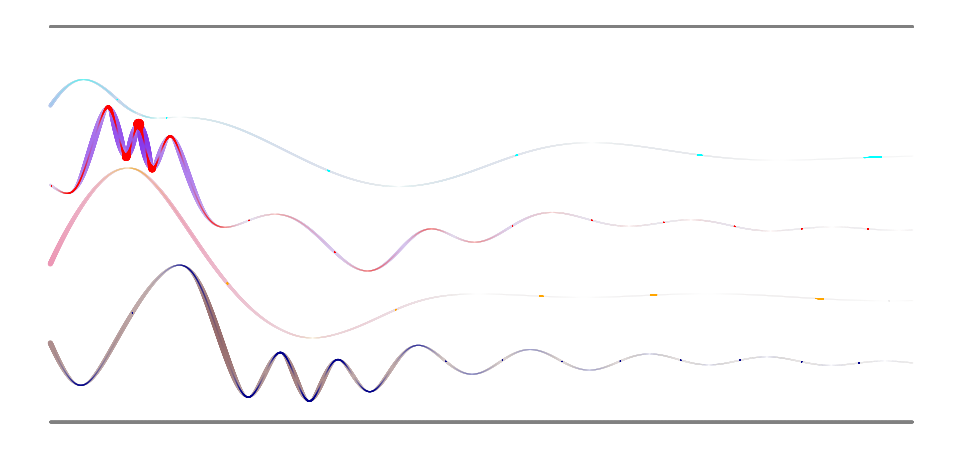

In [188]:
P, Q, R = voice_leading([0, -3, 3, -1, 2, 0], [5, -0.1, 5, -0.1, 5, 5])

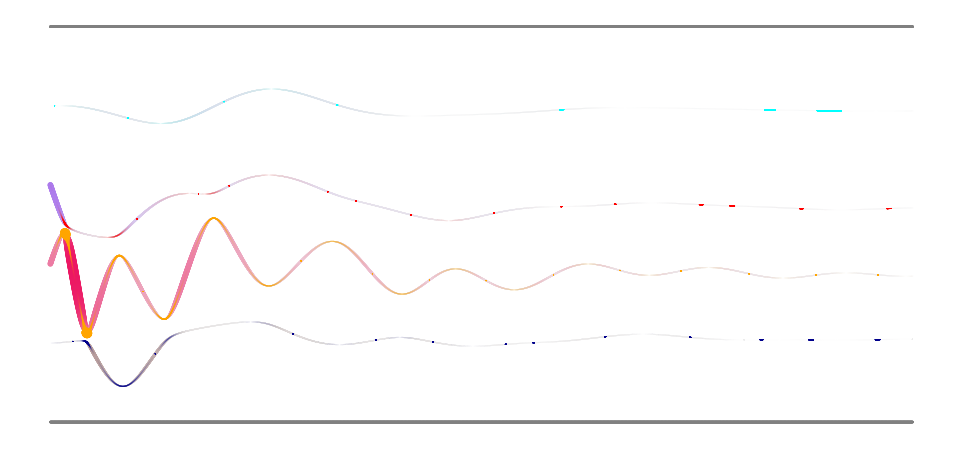

In [189]:
P, Q, R = voice_leading([0, 0, 4, -4, 0, 0], [4, 4, 1, 4, 4, 4])

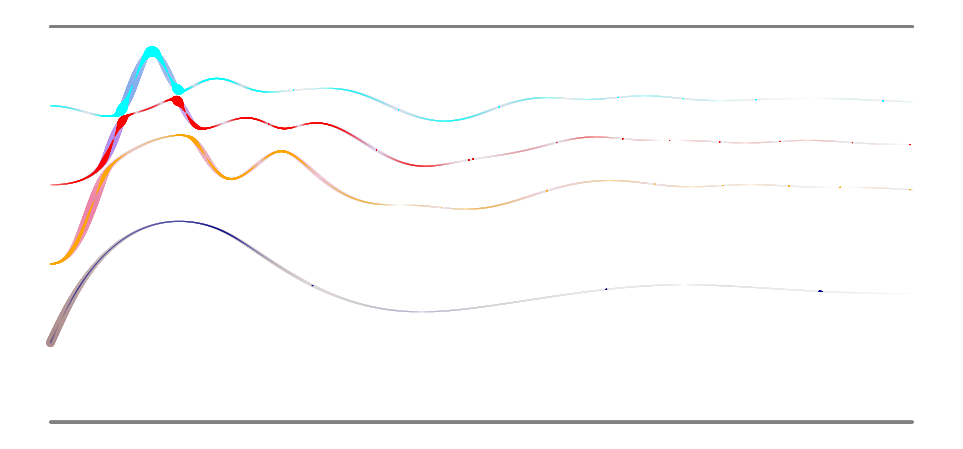

In [190]:
P, Q, R = voice_leading([0, 3, 0, 0, 0, 0], [4, 8, 1, 1, 1, 5])

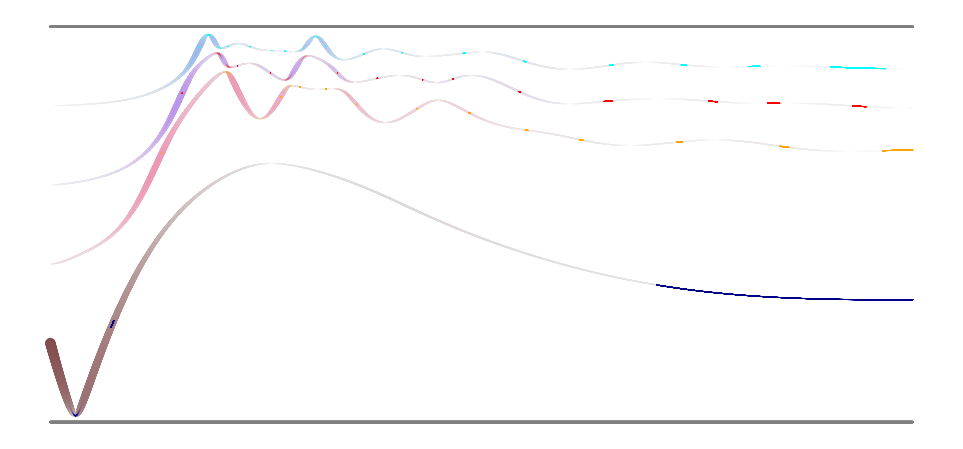

In [191]:
P, Q, R = voice_leading([0, -5, 0, 0, 0, 0], [1, 9, .5, .5, .5, 1])

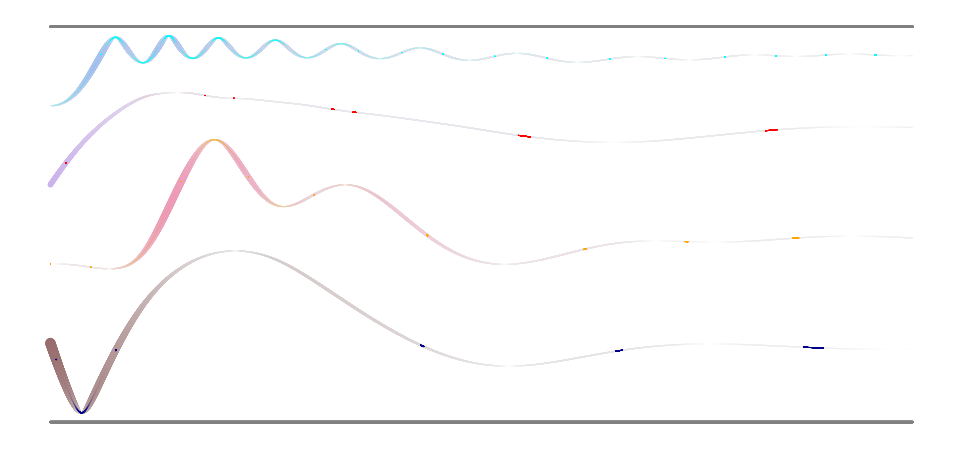

In [192]:
P, Q, R = voice_leading([0, -4, 0, 2, 0, 0], [1, 6, .5, 6, .5, 1])

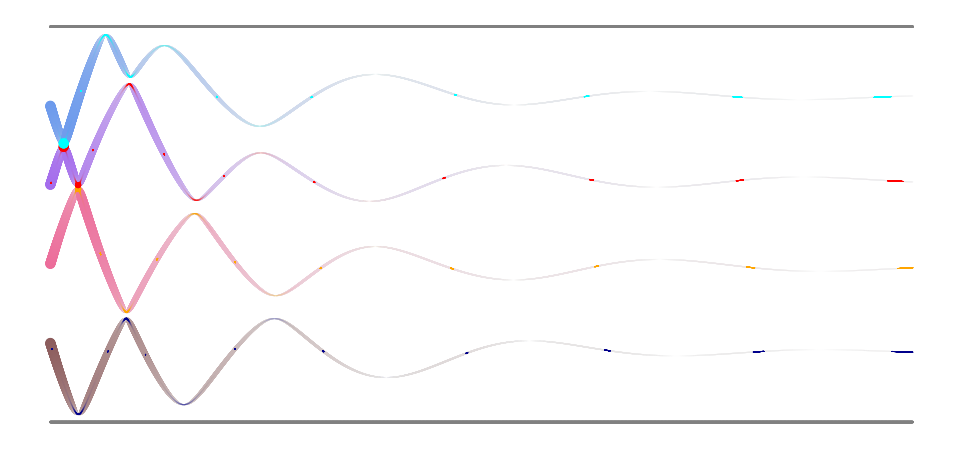

In [193]:
P, Q, R = voice_leading([0, -4.5, 4.5, 4.5, -4.5, 0], [1, 1, 1, 1, 1, 1])

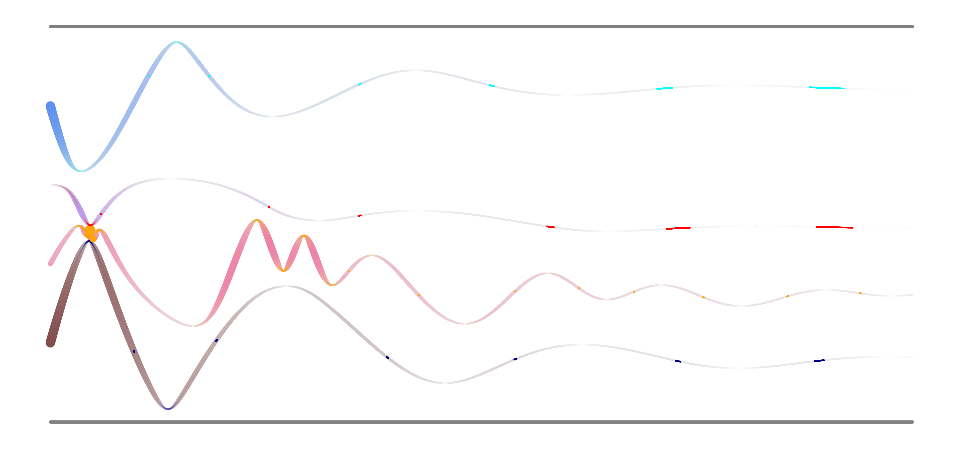

In [194]:
P, Q, R = voice_leading([0, 5, 2.5, 0, -5, 0], [1, 4, -0.1, 4, 4, 1])

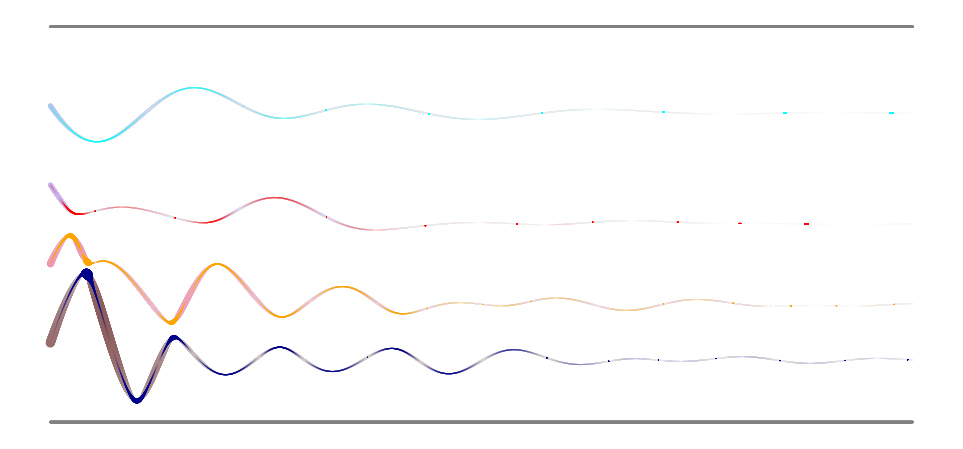

In [195]:
P, Q, R = voice_leading([0, 4, 3, -2, -2, 0], [4, 2, 2, 5, 5, 4])

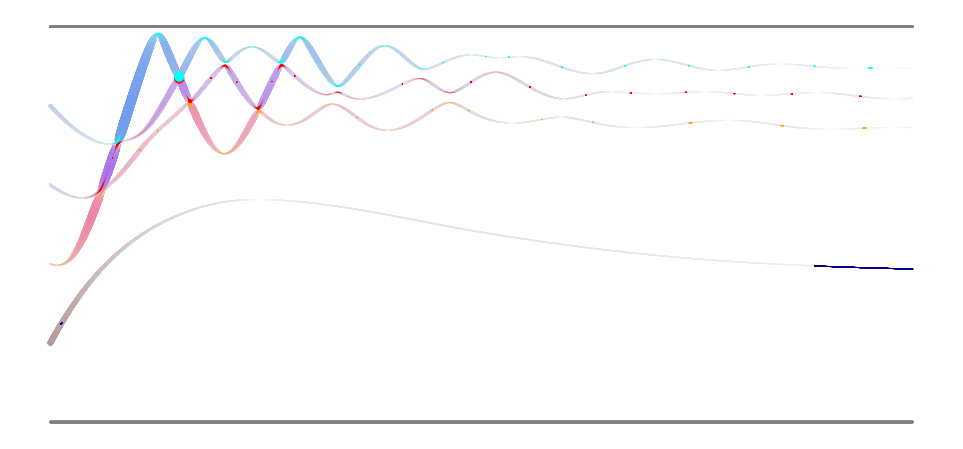

In [196]:
P, Q, R = voice_leading([0, 2.5, -0.5, -1, -1.5, 0], [1, 8, .25, .25, .25, 1])

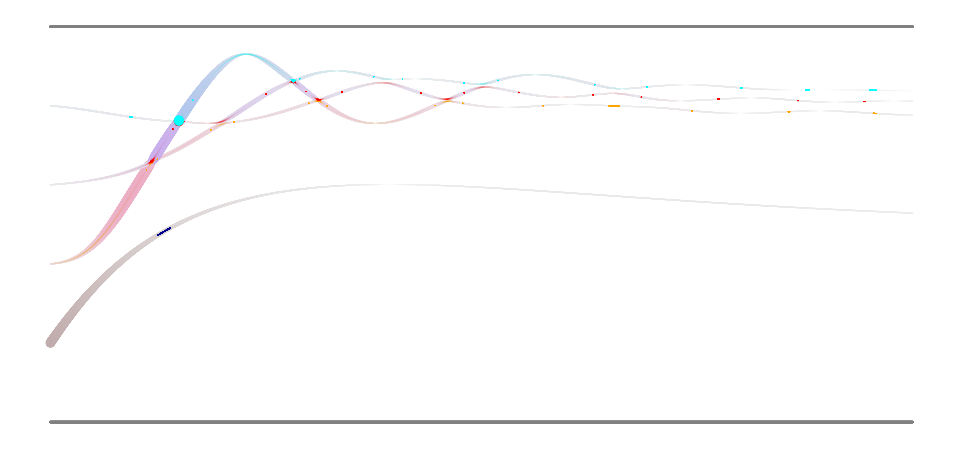

In [197]:
P, Q, R = voice_leading([0, 2, .1, .1, -.1, 0], [1, 2, .01, .01, .01, 1])

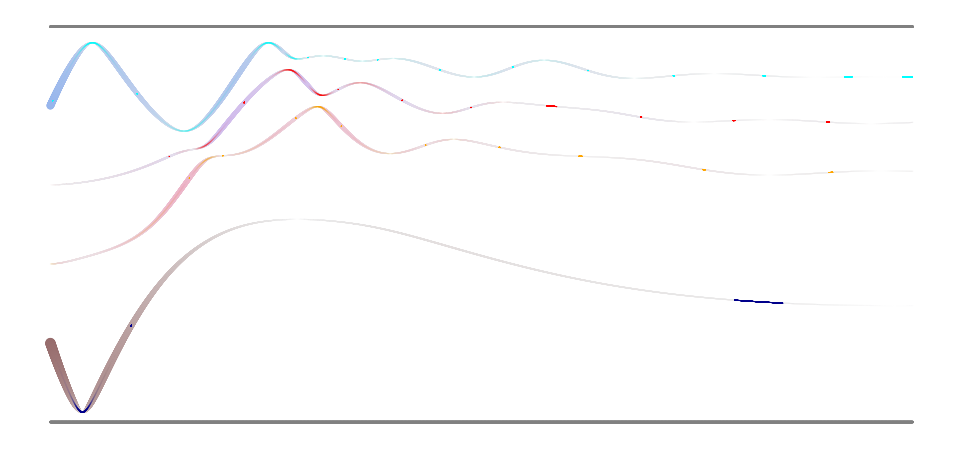

In [198]:
P, Q, R = voice_leading([0, -4, 0, 0, 3, 0], [1, 5, .5, .5, .5, 1])

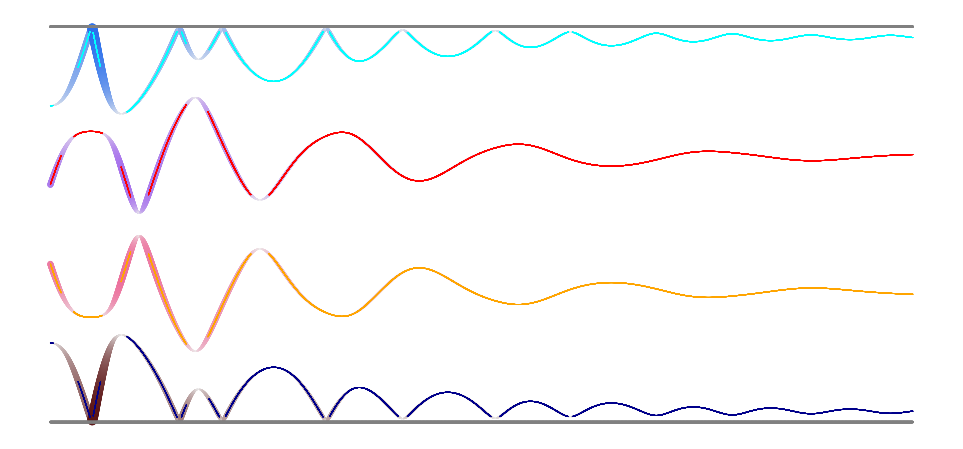

In [199]:
P, Q, R = voice_leading([0, 0, -4, 4, 0, 0], [.1, 10, 10, 10, 10, .1])

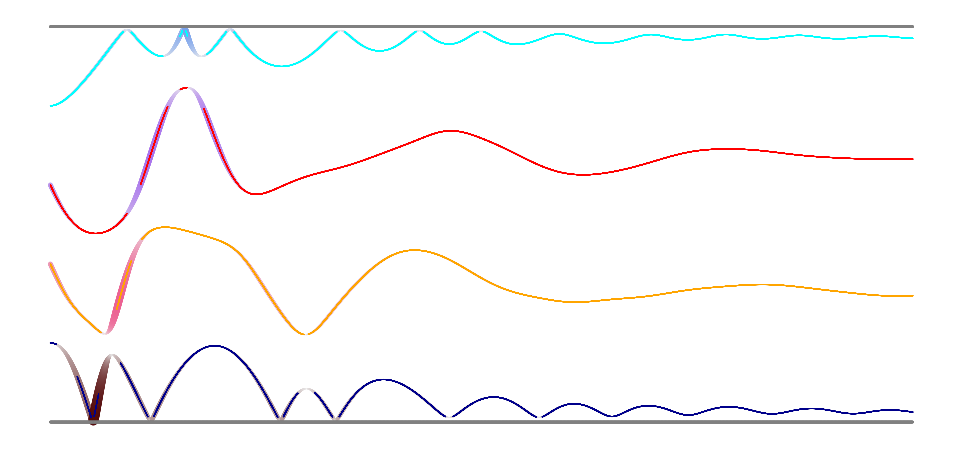

In [200]:
P, Q, R = voice_leading([0, 0, -3, -3, 0, 0], [.1, 10, 10, 10, 10, .1])

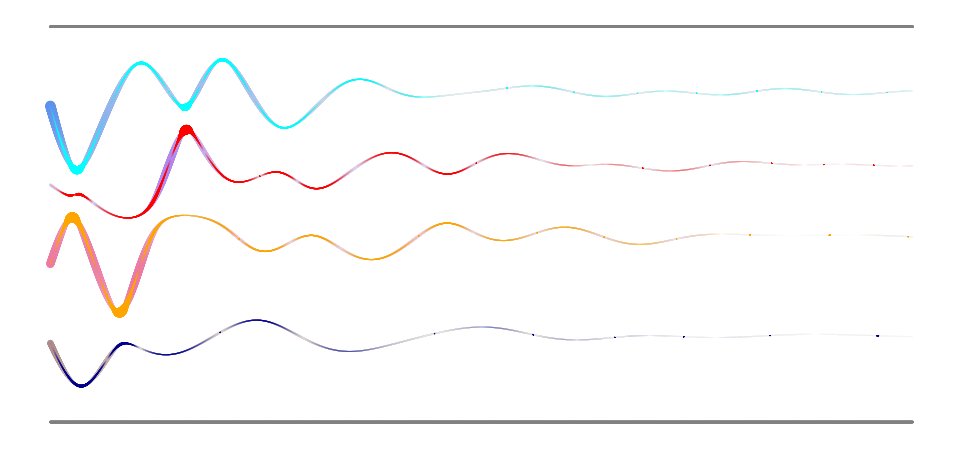

In [201]:
P, Q, R = voice_leading([0, -3, 4, -1, -5, 0], [5, 10, 4, 4, 5, 5])

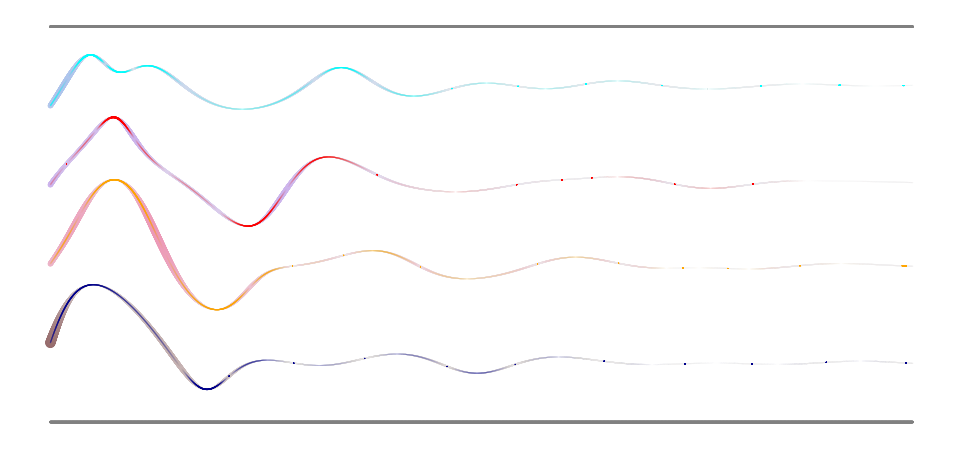

In [202]:
P, Q, R = voice_leading([0, 4, 2, 2, 2, 0], [4, 12, 7, 7, 12, 4])

In [203]:
def voice_leading_B(starting_positions,
                    starting_velocities,
                    point_masses,
                    field_strength,
                    friction):
    number_of_steps = 8000

    factors = []
    for i in range(4):
        for j in range(4):
            factors.append(2**i * 5**j)

    factors.sort()

    durations = [1/divisor for divisor in factors]
    durations.sort()

    step_duration = durations[0]

    initial_state = State(time = 0.0,
                          masses = point_masses,
                          positions = starting_positions,
                          velocities = starting_velocities,
                          accelerations = [.0 for v in starting_velocities],
                          fixed = [0, len(point_masses)-1])

    state_list = [initial_state]
    for i in range(number_of_steps):
        state = state_list[i]
        new_state = state.time_step(duration = step_duration,
                                    force_field = vector_field,
                                    field_strength = field_strength,
                                    friction = friction)
        state_list.append(copy.deepcopy(new_state))

    position_evol = []
    for state in state_list:
        positions = state.positions
        #velocities = state.velocities
        position_evol.append([copy.deepcopy(positions),
                              #copy.deepcopy(velocities)
                             ])

    individual_evols = []
    for k in range(6):
        this_evol = []
        for positions in position_evol:
            position = positions[0][k]
            this_evol.append(copy.deepcopy(position))
        individual_evols.append(copy.deepcopy(this_evol))
        
    velocity_evol = []
    for state in state_list:
        velocities = state.velocities
        #velocities = state.velocities
        velocity_evol.append([copy.deepcopy(velocities)])
        
    max_velocity = max([max([abs(velocity) for velocity in state.velocities]) for state in state_list])
        
    individual_velocities = []
    for k in range(6):
        this_evol = []
        for velocities in velocity_evol:
            #if max_velocity != .0:
            #     velocities[0][k] = velocities[0][k]/max_velocity
            velocity = velocities[0][k]
            this_evol.append(copy.deepcopy(velocity))
        individual_velocities.append(copy.deepcopy(this_evol))
        
    acceleration_evol = []
    for state in state_list:
        accelerations = state.accelerations
        acceleration_evol.append([copy.deepcopy(accelerations)])
        
    max_accel = max([max([abs(acceleration) for acceleration in state.accelerations]) for state in state_list])
        
    individual_accelerations = []
    for k in range(6):
        this_evol = []
        for accelerations in acceleration_evol:
            if max_accel != .0:
                 accelerations[0][k] = accelerations[0][k]/max_accel
            acceleration = accelerations[0][k]
            this_evol.append(copy.deepcopy(acceleration))
        individual_accelerations.append(copy.deepcopy(this_evol))
        
    for state in state_list:
        accelerations = state.accelerations
        acceleration_evol.append([copy.deepcopy(accelerations)])
        
    local_extrema = []
    for evol in individual_evols:
        present_local_extrema = []
        for i in range(1,len(evol)-2):
            triple = [evol[i-1],
                      evol[i],
                      evol[i+1]]
            if evol[i-1] < evol[i] and evol[i+1] < evol[i]:
                present_local_extrema.append([i, evol[i]])
            elif evol[i-1] > evol[i] and evol[i+1] > evol[i]:
                present_local_extrema.append([i,evol[i]])
            else:
                pass
        local_extrema.append(copy.deepcopy(present_local_extrema))


    X = [i for i in range(number_of_steps+1)]

    f = plt.figure()
    f.set_figwidth(17)
    f.set_figheight(8)
    
    for k in range(len(point_masses)):
        if k == 0 or k == len(point_masses)-1:
            color = 'lightgray'
            sizes = [2 for x in X]
        elif k == 1:
            color = [(0.925-abs(velocity_evol[x][0][k])/12,  0.925-abs(velocity_evol[x][0][k])/8, 0.925-abs(velocity_evol[x][0][k])/8) for x in X]
            sizes = [84 * abs(velocity_evol[x][0][k]/max_velocity)**(2.25) for x in X]
        elif k == 2:
            color = [(0.925, 0.925-abs(velocity_evol[x][0][k])/9, 0.925-abs(velocity_evol[x][0][k])/14) for x in X]
            sizes = [84 * abs(velocity_evol[x][0][k]/max_velocity)**(2.25) for x in X]
        elif k == 3:
            color = [( 0.925-abs(velocity_evol[x][0][k])/16,  0.925-abs(velocity_evol[x][0][k])/9, 0.925) for x in X]
            sizes = [84 * abs(velocity_evol[x][0][k]/max_velocity)**(2.25) for x in X]
        elif k == 4:
            color = [(0.925-abs(velocity_evol[x][0][k])/9,  0.925-abs(velocity_evol[x][0][k])/14, 0.925) for x in X]
            sizes = [84 * abs(velocity_evol[x][0][k]/max_velocity)**(2.25) for x in X]
        Y = individual_evols[k]
        plt.scatter(X, Y, sizes, c=color)
        
    for k in range(len(point_masses)):
        if k == 0 or k == len(point_masses)-1:
            color = 'gray'
            sizes = [2 for x in X]
        elif k == 1:
            color = ['darkblue' for x in X]
            sizes = [84.5 * abs(acceleration_evol[x][0][k])**(3.25) for x in X]
        elif k == 2:
            color = ['orange' for x in X]
            sizes = [84.5 * abs(acceleration_evol[x][0][k])**(3.25) for x in X]
        elif k == 3:
            color = ['red' for x in X]
            sizes = [84.5 * abs(acceleration_evol[x][0][k])**(3.25) for x in X]
        elif k == 4:
            color = ['aqua' for x in X]
            sizes = [84.5 * abs(acceleration_evol[x][0][k])**(3.25) for x in X]
        Y = individual_evols[k]
        plt.scatter(X, Y, s=sizes, c=color)
        
    for extrema_list in local_extrema:
        A = [pair[0] for pair in extrema_list]
        B = [pair[1] for pair in extrema_list]
        #print(len(A))
        #print(len(B))
        plt.scatter(A, B, marker='|', s=250)

#    for k in range(6):
#        plt.scatter(X, individual_evols[k])
    plt.axis('off')
    plt.show()
    
    return individual_evols, individual_velocities, individual_accelerations

In [204]:
def voice_leading_C(starting_positions,
                    starting_velocities,
                    point_masses,
                    field_strength,
                    friction,
                    change_steps,
                    velocity_changes):
    number_of_steps = 8000

    factors = []
    for i in range(4):
        for j in range(4):
            factors.append(2**i * 5**j)

    factors.sort()

    durations = [1/divisor for divisor in factors]
    durations.sort()

    step_duration = durations[0]

    initial_state = State(time = 0.0,
                          masses = point_masses,
                          positions = starting_positions,
                          velocities = starting_velocities,
                          accelerations = [.0 for v in starting_velocities],
                          fixed = [0, len(point_masses)-1])

    state_list = [initial_state]
    vel_change_cnt = 0
    for i in range(number_of_steps):
        state = state_list[i]
        new_state = state.time_step(duration = step_duration,
                                    force_field = vector_field,
                                    field_strength = field_strength,
                                    friction = friction)
        if i in change_steps:
            kicks = velocity_changes[vel_change_cnt]
            changed_velocities = []
            for k in range(len(new_state.velocities)):
                changed_velocities.append(new_state.velocities[k] + kicks[k])
            new_state.velocities = changed_velocities
            vel_change_cnt = vel_change_cnt + 1
        state_list.append(copy.deepcopy(new_state))

    position_evol = []
    for state in state_list:
        positions = state.positions
        #velocities = state.velocities
        position_evol.append([copy.deepcopy(positions),
                              #copy.deepcopy(velocities)
                             ])

    individual_evols = []
    for k in range(6):
        this_evol = []
        for positions in position_evol:
            position = positions[0][k]
            this_evol.append(copy.deepcopy(position))
        individual_evols.append(copy.deepcopy(this_evol))
        
    velocity_evol = []
    for state in state_list:
        velocities = state.velocities
        #velocities = state.velocities
        velocity_evol.append([copy.deepcopy(velocities)])
        
    max_velocity = max([max([abs(velocity) for velocity in state.velocities]) for state in state_list])
        
    individual_velocities = []
    for k in range(6):
        this_evol = []
        for velocities in velocity_evol:
            #if max_velocity != .0:
            #     velocities[0][k] = velocities[0][k]/max_velocity
            velocity = velocities[0][k]
            this_evol.append(copy.deepcopy(velocity))
        individual_velocities.append(copy.deepcopy(this_evol))
        
    acceleration_evol = []
    for state in state_list:
        accelerations = state.accelerations
        acceleration_evol.append([copy.deepcopy(accelerations)])
        
    max_accel = max([max([abs(acceleration) for acceleration in state.accelerations]) for state in state_list])
        
    individual_accelerations = []
    for k in range(6):
        this_evol = []
        for accelerations in acceleration_evol:
            if max_accel != .0:
                 accelerations[0][k] = accelerations[0][k]/max_accel
            acceleration = accelerations[0][k]
            this_evol.append(copy.deepcopy(acceleration))
        individual_accelerations.append(copy.deepcopy(this_evol))
        
    for state in state_list:
        accelerations = state.accelerations
        acceleration_evol.append([copy.deepcopy(accelerations)])
        
    local_extrema = []
    for evol in individual_evols:
        present_local_extrema = []
        for i in range(1,len(evol)-2):
            triple = [evol[i-1],
                      evol[i],
                      evol[i+1]]
            if evol[i-1] < evol[i] and evol[i+1] < evol[i]:
                present_local_extrema.append([i, evol[i]])
            elif evol[i-1] > evol[i] and evol[i+1] > evol[i]:
                present_local_extrema.append([i,evol[i]])
            else:
                pass
        local_extrema.append(copy.deepcopy(present_local_extrema))


    X = [i for i in range(number_of_steps+1)]

    f = plt.figure()
    f.set_figwidth(17)
    f.set_figheight(8)
    
    for k in range(len(point_masses)):
        if k == 0 or k == len(point_masses)-1:
            color = 'lightgray'
            sizes = [2 for x in X]
        elif k == 1:
            color = [(0.925-abs(velocity_evol[x][0][k])/12,  0.925-abs(velocity_evol[x][0][k])/8, 0.925-abs(velocity_evol[x][0][k])/8) for x in X]
            sizes = [84 * abs(velocity_evol[x][0][k]/max_velocity)**(2.25) for x in X]
        elif k == 2:
            color = [(0.925, 0.925-abs(velocity_evol[x][0][k])/9, 0.925-abs(velocity_evol[x][0][k])/14) for x in X]
            sizes = [84 * abs(velocity_evol[x][0][k]/max_velocity)**(2.25) for x in X]
        elif k == 3:
            color = [( 0.925-abs(velocity_evol[x][0][k])/16,  0.925-abs(velocity_evol[x][0][k])/9, 0.925) for x in X]
            sizes = [84 * abs(velocity_evol[x][0][k]/max_velocity)**(2.25) for x in X]
        elif k == 4:
            color = [(0.925-abs(velocity_evol[x][0][k])/9,  0.925-abs(velocity_evol[x][0][k])/14, 0.925) for x in X]
            sizes = [84 * abs(velocity_evol[x][0][k]/max_velocity)**(2.25) for x in X]
        Y = individual_evols[k]
        plt.scatter(X, Y, sizes, c=color)
        
    for k in range(len(point_masses)):
        if k == 0 or k == len(point_masses)-1:
            color = 'gray'
            sizes = [2 for x in X]
        elif k == 1:
            color = ['darkblue' for x in X]
            sizes = [84.5 * abs(acceleration_evol[x][0][k])**(3.25) for x in X]
        elif k == 2:
            color = ['orange' for x in X]
            sizes = [84.5 * abs(acceleration_evol[x][0][k])**(3.25) for x in X]
        elif k == 3:
            color = ['red' for x in X]
            sizes = [84.5 * abs(acceleration_evol[x][0][k])**(3.25) for x in X]
        elif k == 4:
            color = ['aqua' for x in X]
            sizes = [84.5 * abs(acceleration_evol[x][0][k])**(3.25) for x in X]
        Y = individual_evols[k]
        plt.scatter(X, Y, s=sizes, c=color)
        
    for extrema_list in local_extrema:
        A = [pair[0] for pair in extrema_list]
        B = [pair[1] for pair in extrema_list]
        #print(len(A))
        #print(len(B))
        plt.scatter(A, B, marker='|', s=250)

#    for k in range(6):
#        plt.scatter(X, individual_evols[k])
    plt.axis('off')
    plt.show()
    
    return individual_evols, individual_velocities, individual_accelerations

In [205]:
def voice_leading_D(starting_positions,
                    starting_velocities,
                    point_masses,
                    field_strength,
                    friction,
                    pos_change_steps,
                    position_changes,
                    change_steps,
                    velocity_changes):
    number_of_steps = 8000

    factors = []
    for i in range(4):
        for j in range(4):
            factors.append(2**i * 5**j)

    factors.sort()

    durations = [1/divisor for divisor in factors]
    durations.sort()

    step_duration = durations[0]

    initial_state = State(time = 0.0,
                          masses = point_masses,
                          positions = starting_positions,
                          velocities = starting_velocities,
                          accelerations = [.0 for v in starting_velocities],
                          fixed = [0, len(point_masses)-1])

    state_list = [initial_state]
    pos_change_cnt = 0
    vel_change_cnt = 0
    for i in range(number_of_steps):
        state = state_list[i]
        new_state = state.time_step(duration = step_duration,
                                    force_field = vector_field,
                                    field_strength = field_strength,
                                    friction = friction)
        
        if i in pos_change_steps:
            moves = position_changes[pos_change_cnt]
            changed_positions = []
            for k in range(len(new_state.positions)):
                changed_positions.append(new_state.positions[k] + moves[k])
            new_state.positions = changed_positions
            pos_change_cnt = pos_change_cnt + 1
        
        if i in change_steps:
            kicks = velocity_changes[vel_change_cnt]
            changed_velocities = []
            for k in range(len(new_state.velocities)):
                changed_velocities.append(new_state.velocities[k] + kicks[k])
            new_state.velocities = changed_velocities
            vel_change_cnt = vel_change_cnt + 1
            
        state_list.append(copy.deepcopy(new_state))

    position_evol = []
    for state in state_list:
        positions = state.positions
        #velocities = state.velocities
        position_evol.append([copy.deepcopy(positions),
                              #copy.deepcopy(velocities)
                             ])

    individual_evols = []
    for k in range(6):
        this_evol = []
        for positions in position_evol:
            position = positions[0][k]
            this_evol.append(copy.deepcopy(position))
        individual_evols.append(copy.deepcopy(this_evol))
        
    velocity_evol = []
    for state in state_list:
        velocities = state.velocities
        #velocities = state.velocities
        velocity_evol.append([copy.deepcopy(velocities)])
        
    max_velocity = max([max([abs(velocity) for velocity in state.velocities]) for state in state_list])
        
    individual_velocities = []
    for k in range(6):
        this_evol = []
        for velocities in velocity_evol:
            #if max_velocity != .0:
            #     velocities[0][k] = velocities[0][k]/max_velocity
            velocity = velocities[0][k]
            this_evol.append(copy.deepcopy(velocity))
        individual_velocities.append(copy.deepcopy(this_evol))
        
    acceleration_evol = []
    for state in state_list:
        accelerations = state.accelerations
        acceleration_evol.append([copy.deepcopy(accelerations)])
        
    max_accel = max([max([abs(acceleration) for acceleration in state.accelerations]) for state in state_list])
        
    individual_accelerations = []
    for k in range(6):
        this_evol = []
        for accelerations in acceleration_evol:
            if max_accel != .0:
                 accelerations[0][k] = accelerations[0][k]/max_accel
            acceleration = accelerations[0][k]
            this_evol.append(copy.deepcopy(acceleration))
        individual_accelerations.append(copy.deepcopy(this_evol))
        
    for state in state_list:
        accelerations = state.accelerations
        acceleration_evol.append([copy.deepcopy(accelerations)])
        
    local_extrema = []
    for evol in individual_evols:
        present_local_extrema = []
        for i in range(1,len(evol)-2):
            triple = [evol[i-1],
                      evol[i],
                      evol[i+1]]
            if evol[i-1] < evol[i] and evol[i+1] < evol[i]:
                present_local_extrema.append([i, evol[i]])
            elif evol[i-1] > evol[i] and evol[i+1] > evol[i]:
                present_local_extrema.append([i,evol[i]])
            else:
                pass
        local_extrema.append(copy.deepcopy(present_local_extrema))


    X = [i for i in range(number_of_steps+1)]

    f = plt.figure()
    f.set_figwidth(17)
    f.set_figheight(8)
    
    for k in range(len(point_masses)):
        if k == 0 or k == len(point_masses)-1:
            color = 'lightgray'
            sizes = [2 for x in X]
        elif k == 1:
            color = [(0.925-abs(velocity_evol[x][0][k])/12,  0.925-abs(velocity_evol[x][0][k])/8, 0.925-abs(velocity_evol[x][0][k])/8) for x in X]
            sizes = [84 * abs(velocity_evol[x][0][k]/max_velocity)**(2.25) for x in X]
        elif k == 2:
            color = [(0.925, 0.925-abs(velocity_evol[x][0][k])/9, 0.925-abs(velocity_evol[x][0][k])/14) for x in X]
            sizes = [84 * abs(velocity_evol[x][0][k]/max_velocity)**(2.25) for x in X]
        elif k == 3:
            color = [( 0.925-abs(velocity_evol[x][0][k])/16,  0.925-abs(velocity_evol[x][0][k])/9, 0.925) for x in X]
            sizes = [84 * abs(velocity_evol[x][0][k]/max_velocity)**(2.25) for x in X]
        elif k == 4:
            color = [(0.925-abs(velocity_evol[x][0][k])/9,  0.925-abs(velocity_evol[x][0][k])/14, 0.925) for x in X]
            sizes = [84 * abs(velocity_evol[x][0][k]/max_velocity)**(2.25) for x in X]
        Y = individual_evols[k]
        plt.scatter(X, Y, sizes, c=color)
        
    for k in range(len(point_masses)):
        if k == 0 or k == len(point_masses)-1:
            color = 'gray'
            sizes = [2 for x in X]
        elif k == 1:
            color = ['darkblue' for x in X]
            sizes = [84.5 * abs(acceleration_evol[x][0][k])**(3.25) for x in X]
        elif k == 2:
            color = ['orange' for x in X]
            sizes = [84.5 * abs(acceleration_evol[x][0][k])**(3.25) for x in X]
        elif k == 3:
            color = ['red' for x in X]
            sizes = [84.5 * abs(acceleration_evol[x][0][k])**(3.25) for x in X]
        elif k == 4:
            color = ['aqua' for x in X]
            sizes = [84.5 * abs(acceleration_evol[x][0][k])**(3.25) for x in X]
        Y = individual_evols[k]
        plt.scatter(X, Y, s=sizes, c=color)
        
    for extrema_list in local_extrema:
        A = [pair[0] for pair in extrema_list]
        B = [pair[1] for pair in extrema_list]
        #print(len(A))
        #print(len(B))
        plt.scatter(A, B, marker='|', s=250)

#    for k in range(6):
#        plt.scatter(X, individual_evols[k])
    plt.axis('off')
    plt.show()
    
    return individual_evols, individual_velocities, individual_accelerations

A version for a sequence of masses connected by springs:

In [206]:
def spring_forces(position_list,
          spring_constant_list):
    assert len(position_list) == len(spring_constant_list) + 1
    
    forces = []
    for i in range(len(position_list)):
        this_position = position_list[i]
        total_force = 0
        
        if i == 0:
            next_spring_constant = spring_constant_list[0]
            next_position = position_list[1]
            total_force = next_spring_constant * (next_position - this_position)
        elif i == len(position_list)-1:
            previous_spring_constant = spring_constant_list[i-1]
            previous_position = position_list[i-1]
            total_force = previous_spring_constant * (previous_position - this_position)
        else:
            next_spring_constant = spring_constant_list[i]
            previous_spring_constant = spring_constant_list[i-1]
            next_position = position_list[i+1]
            previous_position = position_list[i-1]
            total_force = next_spring_constant * (next_position - this_position) + previous_spring_constant * (previous_position - this_position)
        
        forces.append(copy.deepcopy(total_force))
    
    return forces

Basic text of `spring_forces` function:

In [207]:
spring_forces([0,.5,1,1.5,4], [1,1,1,1])

[0.5, 0.0, 0.0, 2.0, -2.5]

In [208]:
class Spring_State(State):
    def __init__(self,
                 time: float,
                 masses: list,
                 positions: list,
                 velocities: list,
                 accelerations: list,
                 fixed: list,
                 spring_constants: list):
        
        # call the __init__ method from the parent class
        super().__init__(time, masses, positions, velocities, accelerations, fixed)
        
        # define the new attribute in the child class
        self.spring_constants = spring_constants
        
        
    def spring_step(self, duration, spring_forces, friction):
        field = spring_forces(self.positions, self.spring_constants)
        
        new_accelerations = []
        for i in range(self.count):
            force = field[i]
            mass = self.masses[i]
            new_accelerations.append(copy.deepcopy(force/mass))
        
        new_velocities = []
        for i in range(len(self.velocities)):
            velocity = self.velocities[i]
            acceleration = new_accelerations[i]
            if i in self.fixed:
                new_velocity = friction * velocity
            else:    
                new_velocity = friction * velocity + acceleration * duration
            new_velocities.append(new_velocity)
        
        new_positions = []
        for i in range(len(self.velocities)):
            position = self.positions[i]
            velocity = self.velocities[i]
            if i in self.fixed:
                new_position = position
            else:
                new_position = position + velocity * duration
            new_positions.append(copy.deepcopy(new_position))
            
        new_time = self.time + duration
        
        new_state = Spring_State(new_time,
                                 self.masses,
                                 new_positions,
                                 new_velocities,
                                 new_accelerations,
                                 self.fixed,
                                 self.spring_constants)
        
        return new_state

In [209]:
def voice_springing(starting_positions,
                    starting_velocities,
                    point_masses,
                    spring_constants,
                    friction,
                    pos_change_steps,
                    position_changes,
                    change_steps,
                    velocity_changes):
    number_of_steps = 16000

    factors = []
    for i in range(4):
        for j in range(4):
            factors.append(2**i * 5**j)

    factors.sort()

    durations = [1/divisor for divisor in factors]
    durations.sort()

    step_duration = durations[0]

    initial_state = Spring_State(time = 0.0,
                          masses = point_masses,
                          positions = starting_positions,
                          velocities = starting_velocities,
                          accelerations = [.0 for v in starting_velocities],
                          fixed = [0, len(point_masses)-1],
                          spring_constants = spring_constants)

    state_list = [initial_state]
    pos_change_cnt = 0
    vel_change_cnt = 0
    for i in range(number_of_steps):
        state = state_list[i]
        #print(type(state))
        new_state = state.spring_step(duration = step_duration,
                                    spring_forces = spring_forces,
                                    friction = friction)
        
        if i in pos_change_steps:
            moves = position_changes[pos_change_cnt]
            changed_positions = []
            for k in range(len(new_state.positions)):
                changed_positions.append(new_state.positions[k] + moves[k])
            new_state.positions = changed_positions
            pos_change_cnt = pos_change_cnt + 1
        
        if i in change_steps:
            kicks = velocity_changes[vel_change_cnt]
            changed_velocities = []
            for k in range(len(new_state.velocities)):
                changed_velocities.append(new_state.velocities[k] + kicks[k])
            new_state.velocities = changed_velocities
            vel_change_cnt = vel_change_cnt + 1
            
        state_list.append(copy.deepcopy(new_state))

    position_evol = []
    for state in state_list:
        positions = state.positions
        #velocities = state.velocities
        position_evol.append([copy.deepcopy(positions),
                              #copy.deepcopy(velocities)
                             ])

    individual_evols = []
    for k in range(6):
        this_evol = []
        for positions in position_evol:
            position = positions[0][k]
            this_evol.append(copy.deepcopy(position))
        individual_evols.append(copy.deepcopy(this_evol))
        
    velocity_evol = []
    for state in state_list:
        velocities = state.velocities
        #velocities = state.velocities
        velocity_evol.append([copy.deepcopy(velocities)])
        
    max_velocity = max([max([abs(velocity) for velocity in state.velocities]) for state in state_list])
        
    individual_velocities = []
    for k in range(6):
        this_evol = []
        for velocities in velocity_evol:
            #if max_velocity != .0:
            #     velocities[0][k] = velocities[0][k]/max_velocity
            velocity = velocities[0][k]
            this_evol.append(copy.deepcopy(velocity))
        individual_velocities.append(copy.deepcopy(this_evol))
        
    acceleration_evol = []
    for state in state_list:
        accelerations = state.accelerations
        acceleration_evol.append([copy.deepcopy(accelerations)])
        
    max_accel = max([max([abs(acceleration) for acceleration in state.accelerations]) for state in state_list])
        
    individual_accelerations = []
    for k in range(6):
        this_evol = []
        for accelerations in acceleration_evol:
            if max_accel != .0:
                 accelerations[0][k] = accelerations[0][k]/max_accel
            acceleration = accelerations[0][k]
            this_evol.append(copy.deepcopy(acceleration))
        individual_accelerations.append(copy.deepcopy(this_evol))
        
    for state in state_list:
        accelerations = state.accelerations
        acceleration_evol.append([copy.deepcopy(accelerations)])
        
    local_extrema = []
    for evol in individual_evols:
        present_local_extrema = []
        for i in range(1,len(evol)-2):
            triple = [evol[i-1],
                      evol[i],
                      evol[i+1]]
            if evol[i-1] < evol[i] and evol[i+1] < evol[i]:
                present_local_extrema.append([i, evol[i]])
            elif evol[i-1] > evol[i] and evol[i+1] > evol[i]:
                present_local_extrema.append([i,evol[i]])
            else:
                pass
        local_extrema.append(copy.deepcopy(present_local_extrema))


    X = [i for i in range(number_of_steps+1)]
    
    print('\n\nSpring mechanics:')

    f = plt.figure()
    f.set_figwidth(17)
    f.set_figheight(8)
    
    for k in range(len(point_masses)):
        if k == 0 or k == len(point_masses)-1:
            color = 'lightgray'
            sizes = [2 for x in X]
        elif k == 1:
            color = [(0.925-abs(velocity_evol[x][0][k])/12,  0.925-abs(velocity_evol[x][0][k])/8, 0.925-abs(velocity_evol[x][0][k])/8) for x in X]
            sizes = [84 * abs(velocity_evol[x][0][k]/max_velocity)**(2.25) for x in X]
        elif k == 2:
            color = [(0.925, 0.925-abs(velocity_evol[x][0][k])/9, 0.925-abs(velocity_evol[x][0][k])/14) for x in X]
            sizes = [84 * abs(velocity_evol[x][0][k]/max_velocity)**(2.25) for x in X]
        elif k == 3:
            color = [( 0.925-abs(velocity_evol[x][0][k])/16,  0.925-abs(velocity_evol[x][0][k])/9, 0.925) for x in X]
            sizes = [84 * abs(velocity_evol[x][0][k]/max_velocity)**(2.25) for x in X]
        elif k == 4:
            color = [(0.925-abs(velocity_evol[x][0][k])/9,  0.925-abs(velocity_evol[x][0][k])/14, 0.925) for x in X]
            sizes = [84 * abs(velocity_evol[x][0][k]/max_velocity)**(2.25) for x in X]
        Y = individual_evols[k]
        plt.scatter(X, Y, sizes, c=color)
        
    for k in range(len(point_masses)):
        if k == 0 or k == len(point_masses)-1:
            color = 'gray'
            sizes = [2 for x in X]
        elif k == 1:
            color = ['darkblue' for x in X]
            sizes = [84.5 * abs(acceleration_evol[x][0][k])**(3.25) for x in X]
        elif k == 2:
            color = ['orange' for x in X]
            sizes = [84.5 * abs(acceleration_evol[x][0][k])**(3.25) for x in X]
        elif k == 3:
            color = ['red' for x in X]
            sizes = [84.5 * abs(acceleration_evol[x][0][k])**(3.25) for x in X]
        elif k == 4:
            color = ['aqua' for x in X]
            sizes = [84.5 * abs(acceleration_evol[x][0][k])**(3.25) for x in X]
        Y = individual_evols[k]
        plt.scatter(X, Y, s=sizes, c=color)
        
    for extrema_list in local_extrema:
        A = [pair[0] for pair in extrema_list]
        B = [pair[1] for pair in extrema_list]
        #print(len(A))
        #print(len(B))
        plt.scatter(A, B, marker='|', s=250)

#    for k in range(6):
#        plt.scatter(X, individual_evols[k])
    plt.axis('off')
    plt.show()
    
    return individual_evols, individual_velocities, individual_accelerations

Basic test for `voice_springing`:

Starting positions:
 1 
 2 
 3 
 4


Spring mechanics:


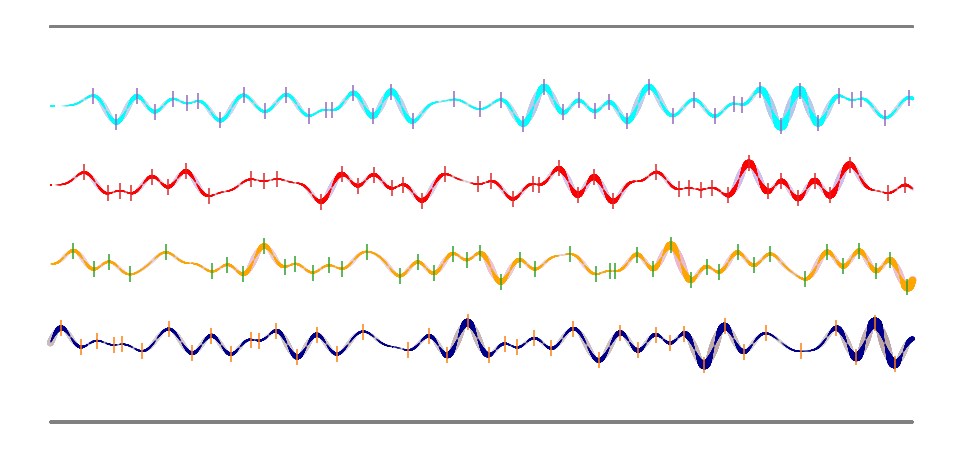

In [210]:
p0 = 1
p1 = 2
p2 = 3
p3 = 4

print(color.BOLD + color.BLUE + 'Starting positions:\n' + color.END, p0, '\n', p1, '\n', p2, '\n', p3)

P, Q, R = voice_springing(starting_positions = [0, p0, p1, p2, p3, 5],
                          starting_velocities = [0, 1.5, 0, 0, 0, 0],
                          point_masses = [1, .25, .25, .25, .25, 1],
                          spring_constants = [8, 8, 8, 8, 8],
                          friction = 1.0,
                          pos_change_steps = [],
                          position_changes = [],
                          change_steps = [],
                          velocity_changes = [])

Starting positions:
 1 
 2 
 3 
 4


Spring mechanics:


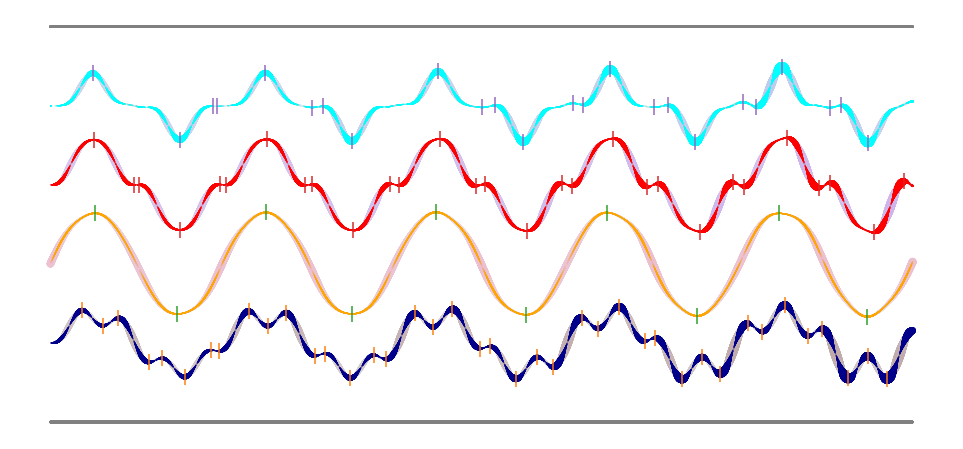

In [211]:
p0 = 1
p1 = 2
p2 = 3
p3 = 4

print(color.BOLD + color.BLUE + 'Starting positions:\n' + color.END, p0, '\n', p1, '\n', p2, '\n', p3)

P, Q, R = voice_springing(starting_positions = [0, p0, p1, p2, p3, 5],
                          starting_velocities = [0, 0, 1.5, 0, 0, 0],
                          point_masses = [1, .25, 1.5, .25, .25, 1],
                          spring_constants = [8, 8, 8, 8, 8],
                          friction = 1.0,
                          pos_change_steps = [],
                          position_changes = [],
                          change_steps = [],
                          velocity_changes = [])

- **Idea 1.** The note-denisty of each line increases with the line's "pointmass velocity."
- **Idea 2.** Lines only sound when they hit notes in a fixed, underlying scale.
- **Idea 3.** Pairs of lines only sound when they form intervals in a fixed interval set.

In [212]:
divisor_array = [[2**i * 3**j for i in range(5)] for j in range(5)]

divisor_list = []
for row in divisor_array:
    divisor_list = divisor_list + row
    
divisor_list.sort()
print(color.BOLD + color.BLUE + '\nList of allowed divisors of one beat, sorted by size:\n' + color.END, divisor_list)

duration_list = [1/div for div in divisor_list]
duration_list.sort()
print(color.BOLD + color.BLUE + '\nList of allowed durations (in beats), sorted by size:\n' + color.END, duration_list)

reversed_duration_list = copy.deepcopy(duration_list)
reversed_duration_list.reverse()
reversed_duration_list = [8 * d for d in reversed_duration_list]


List of allowed divisors of one beat, sorted by size:
 [1, 2, 3, 4, 6, 8, 9, 12, 16, 18, 24, 27, 36, 48, 54, 72, 81, 108, 144, 162, 216, 324, 432, 648, 1296]

List of allowed durations (in beats), sorted by size:
 [0.0007716049382716049, 0.0015432098765432098, 0.0023148148148148147, 0.0030864197530864196, 0.004629629629629629, 0.006172839506172839, 0.006944444444444444, 0.009259259259259259, 0.012345679012345678, 0.013888888888888888, 0.018518518518518517, 0.020833333333333332, 0.027777777777777776, 0.037037037037037035, 0.041666666666666664, 0.05555555555555555, 0.0625, 0.08333333333333333, 0.1111111111111111, 0.125, 0.16666666666666666, 0.25, 0.3333333333333333, 0.5, 1.0]


In [213]:
duration_list = [3**i for i in range(-5, -2)]
print(color.BOLD + color.BLUE + '\nList of allowed durations (in beats), sorted by size:\n' + color.END, duration_list)

reversed_duration_list = copy.deepcopy(duration_list)
reversed_duration_list.reverse()
reversed_duration_list = [8 * d for d in reversed_duration_list]


List of allowed durations (in beats), sorted by size:
 [0.00411522633744856, 0.012345679012345678, 0.037037037037037035]


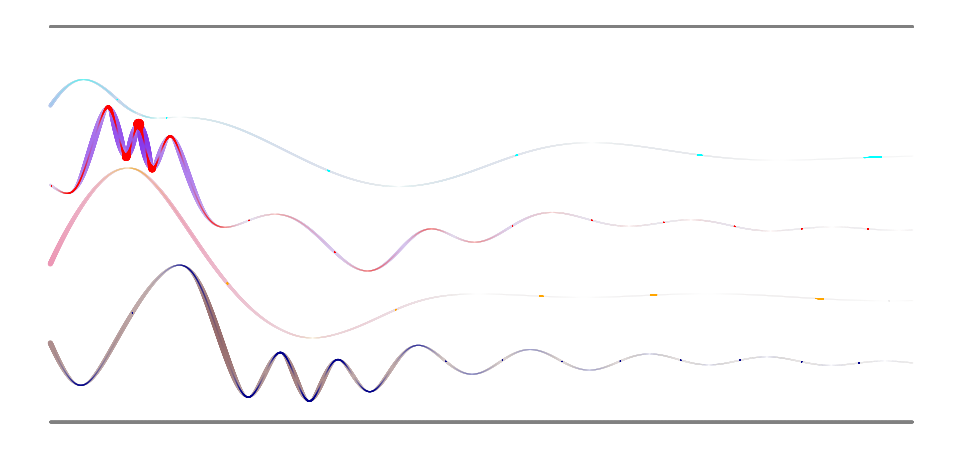

In [214]:
P, Q, R = voice_leading([0, -3, 3, -1, 2, 0], [5, -0.1, 5, -0.1, 5, 5])

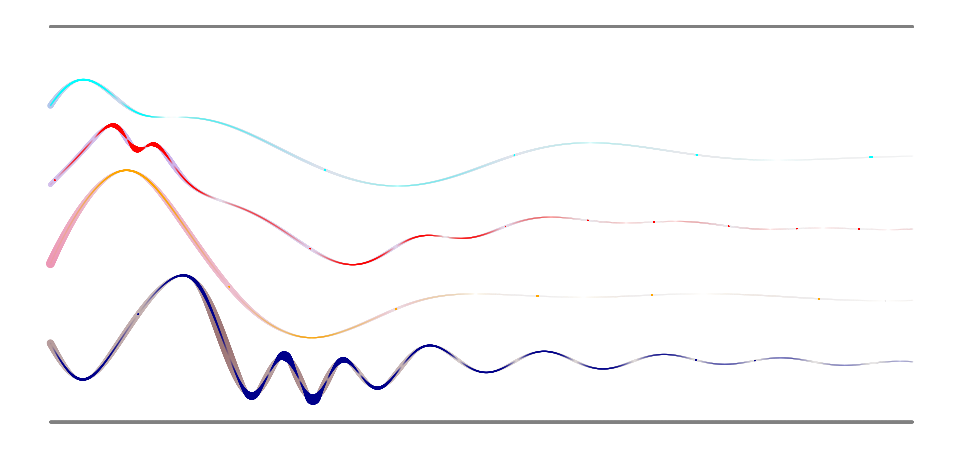

In [215]:
P, Q, R = voice_leading([0, -2.5, 3, 1.5, 2, 0], [5, -0.1, 5, -0.1, 5, 5])

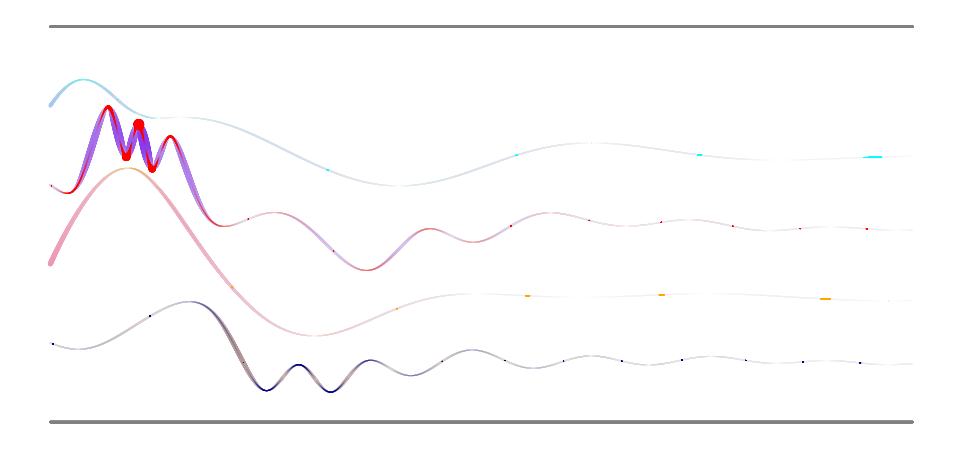

In [216]:
P, Q, R = voice_leading([0, -.5, 3, -1, 2, 0], [5, -0.1, 5, -0.1, 5, 5])

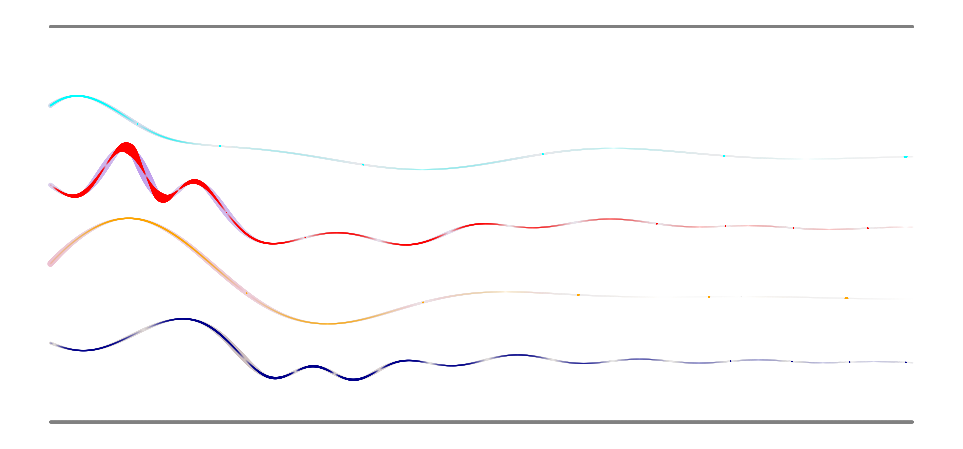

In [217]:
P, Q, R = voice_leading([0, -.5, 1.5, -1, 1, 0], [5, -0.1, 5, -0.1, 5, 5])

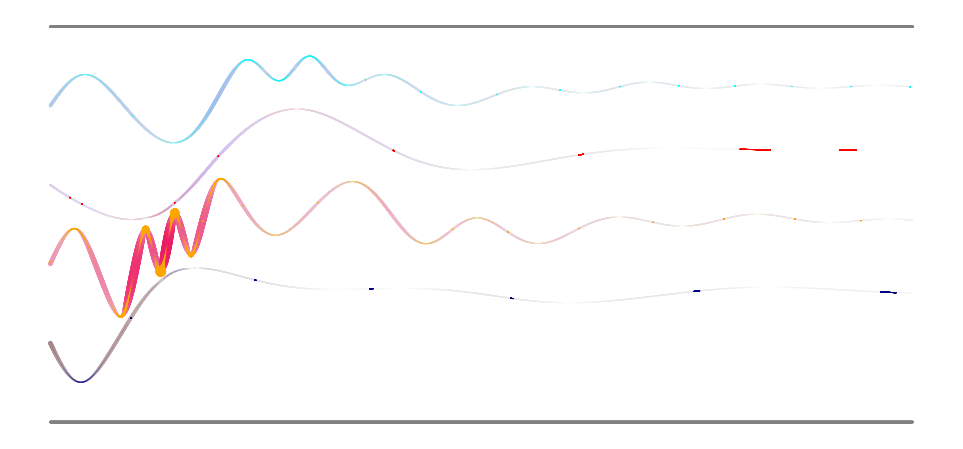

In [218]:
P, Q, R = voice_leading([0, -3, 3, -1, 2, 0], [5, 5, -0.1, 5, -0.1, 5])

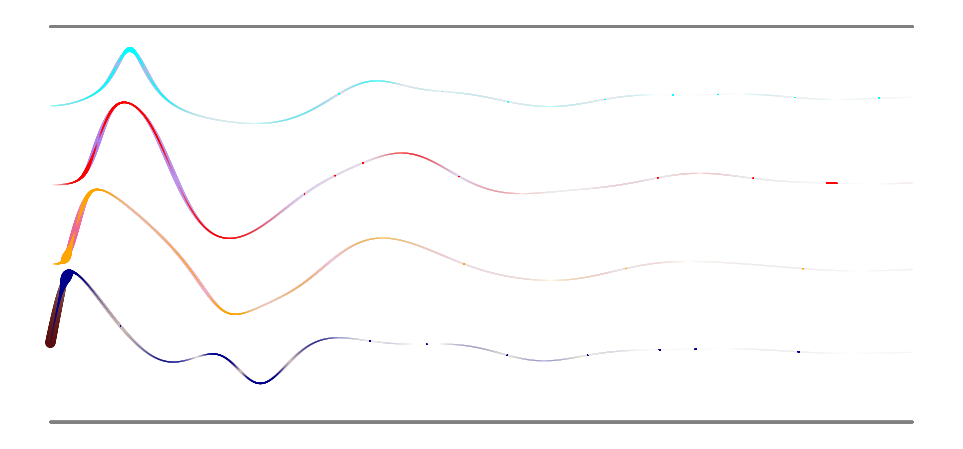

In [219]:
P, Q, R = voice_leading([0, 7, 0, 0, 0, 0], [5, 5, 5, 5, 5, 5])

Starting positions (log_2):
 0.0 
 0.5849625007211562 
 1.3219280948873624 
 1.9068905956085187


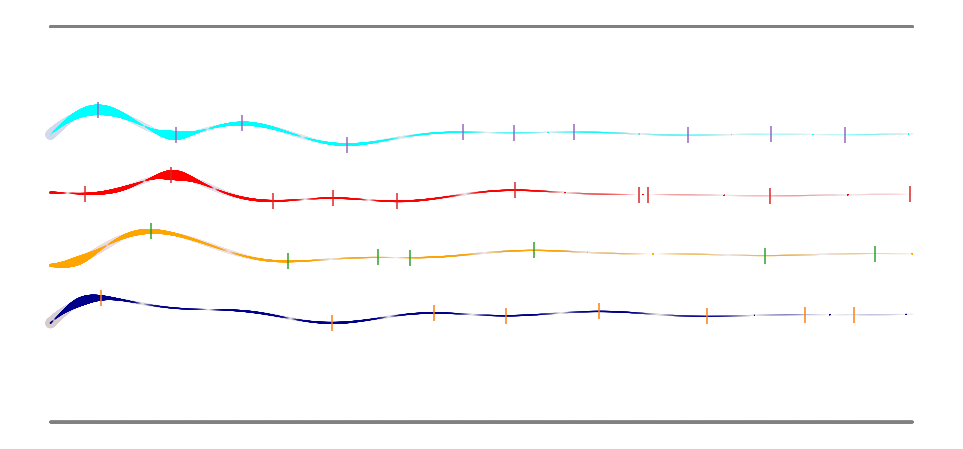

In [220]:
p0 = math.log(1, 2)
p1 = math.log(3/2, 2)
p2 = math.log(5/2, 2)
p3 = math.log(15/4, 2)

print(color.BOLD + color.BLUE + 'Starting positions (log_2):\n' + color.END, p0, '\n', p1, '\n', p2, '\n', p3)

P, Q, R = voice_leading_B(starting_positions = [-1, p0, p1, p2, p3, 3],
                          starting_velocities = [0, 1, 0, 0, 1, 0],
                          point_masses = [5, 1, 1, 1, 1, 5],
                          field_strength = .6,
                          friction = .999)

Starting positions (log_2):
 0.0 
 0.32192809488736235 
 0.5849625007211562 
 0.9068905956085185


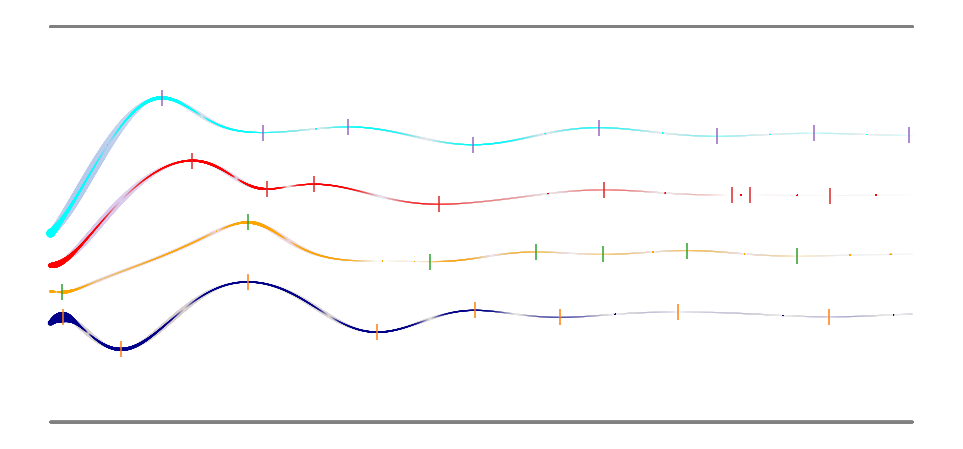

In [221]:
p0 = math.log(1, 2)
p1 = math.log(5/4, 2)
p2 = math.log(3/2, 2)
p3 = math.log(15/8, 2)

print(color.BOLD + color.BLUE + 'Starting positions (log_2):\n' + color.END, p0, '\n', p1, '\n', p2, '\n', p3)

P, Q, R = voice_leading_B(starting_positions = [-1, p0, p1, p2, p3, 3],
                          starting_velocities = [0, 1, 0, 0, 1, 0],
                          point_masses = [5, 1, 1, 1, 1, 5],
                          field_strength = .6,
                          friction = .999)

Starting positions (log_2):
 0.0 
 0.32192809488736235 
 0.5849625007211562 
 0.9068905956085185


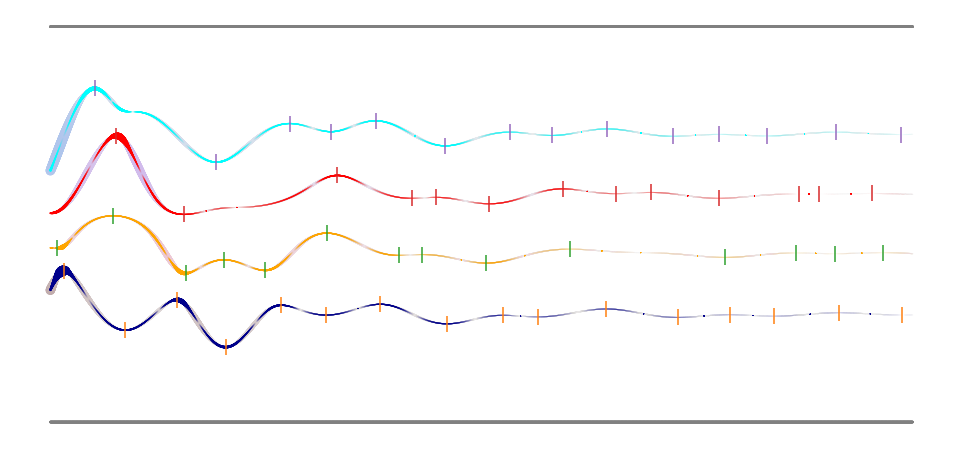

In [222]:
p0 = math.log(1, 2)
p1 = math.log(5/4, 2)
p2 = math.log(3/2, 2)
p3 = math.log(15/8, 2)

print(color.BOLD + color.BLUE + 'Starting positions (log_2):\n' + color.END, p0, '\n', p1, '\n', p2, '\n', p3)

P, Q, R = voice_leading_B(starting_positions = [-1, p0, p1, p2, p3, 2],
                          starting_velocities = [0, 2, 0, 0, 2, 0],
                          point_masses = [5, 1, 1, 1, 1, 5],
                          field_strength = .6,
                          friction = .999)

Starting positions (log_2):
 0.0 
 1.3219280948873624 
 1.9068905956085187 
 3.228818690495881


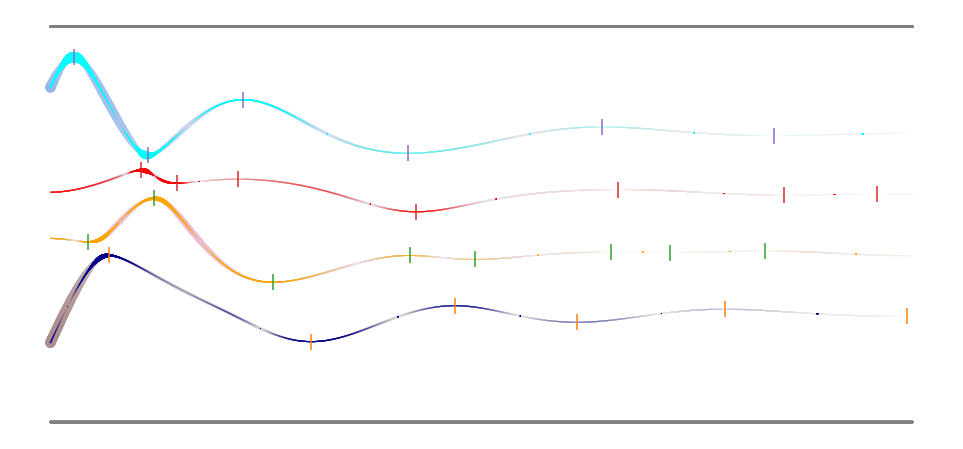

In [223]:
p0 = math.log(1, 2)
p1 = math.log(5/2, 2)
p2 = math.log(15/4, 2)
p3 = math.log(75/8, 2)

print(color.BOLD + color.BLUE + 'Starting positions (log_2):\n' + color.END, p0, '\n', p1, '\n', p2, '\n', p3)

P, Q, R = voice_leading_B(starting_positions = [-1, p0, p1, p2, p3, 4],
                          starting_velocities = [0, 3, 0, 0, 3, 0],
                          point_masses = [5, 1, 1, 1, 1, 5],
                          field_strength = .6,
                          friction = .999)

Starting positions (log_2):
 0.4150374992788437 
 1.736965594166206 
 1.2223924213364477 
 2.5443205162238103


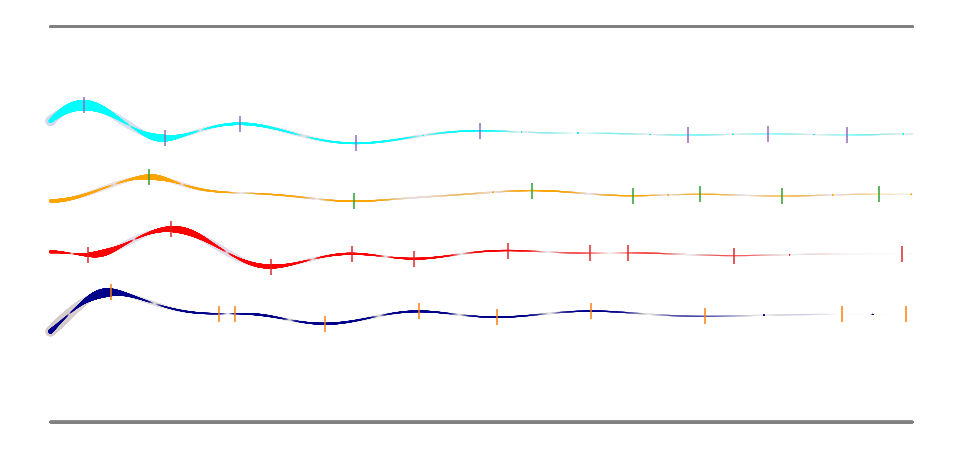

In [224]:
p0 = math.log(4/3 * 1, 2)
p1 = math.log(4/3 * 5/2, 2)
p2 = math.log(4/3 * 7/4, 2)
p3 = math.log(4/3 * 35/8, 2)

print(color.BOLD + color.BLUE + 'Starting positions (log_2):\n' + color.END, p0, '\n', p1, '\n', p2, '\n', p3)

P, Q, R = voice_leading_B(starting_positions = [-.5, p0, p1, p2, p3, 3.5],
                          starting_velocities = [0, 1, 0, 0, 1, 0],
                          point_masses = [5, 1, 1, 1, 1, 5],
                          field_strength = .6,
                          friction = .999)

Starting positions (log_2):
 1.5849625007211563 
 2.1699250014423126 
 2.9068905956085187 
 3.491853096329675


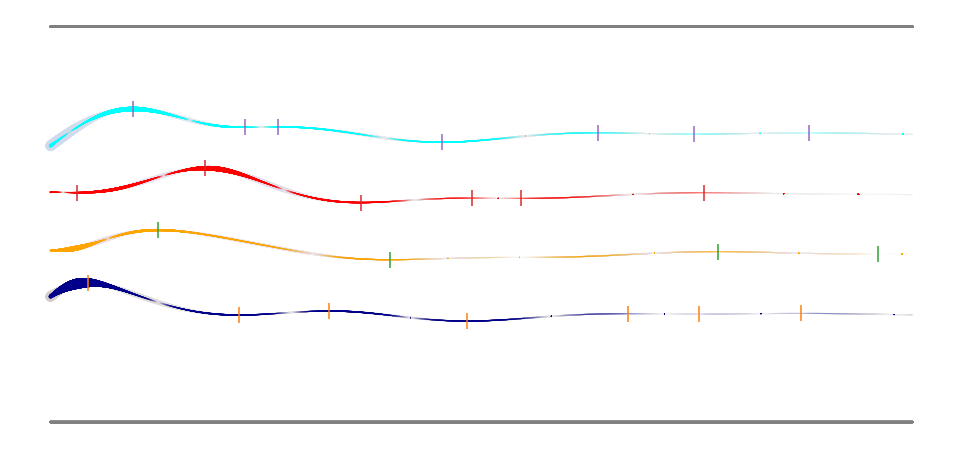

In [225]:
p0 = math.log(3 * 1, 2)
p1 = math.log(3 * 3/2, 2)
p2 = math.log(3 * 5/2, 2)
p3 = math.log(3 * 15/4, 2)

print(color.BOLD + color.BLUE + 'Starting positions (log_2):\n' + color.END, p0, '\n', p1, '\n', p2, '\n', p3)

P, Q, R = voice_leading_B(starting_positions = [0, p0, p1, p2, p3, 5],
                          starting_velocities = [0, 1, 0, 0, 1, 0],
                          point_masses = [5, 1, 1, 1, 1, 5],
                          field_strength = .6,
                          friction = .999)

Starting positions (log_2):
 1.5849625007211563 
 1.9068905956085187 
 2.1699250014423126 
 2.4918530963296748


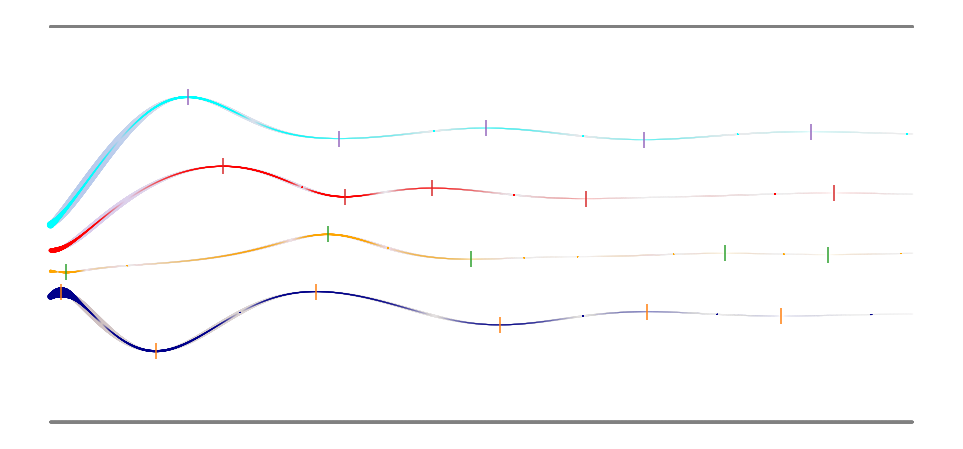

In [226]:
p0 = math.log(3 * 1, 2)
p1 = math.log(3 * 5/4, 2)
p2 = math.log(3 * 3/2, 2)
p3 = math.log(3 * 15/8, 2)

print(color.BOLD + color.BLUE + 'Starting positions (log_2):\n' + color.END, p0, '\n', p1, '\n', p2, '\n', p3)

P, Q, R = voice_leading_B(starting_positions = [0, p0, p1, p2, p3, 5],
                          starting_velocities = [0, 1, 0, 0, 1, 0],
                          point_masses = [5, 1, 1, 1, 1, 5],
                          field_strength = .6,
                          friction = .999)

Starting positions (log_2):
 2.0 
 3.3219280948873626 
 2.807354922057604 
 4.129283016944967


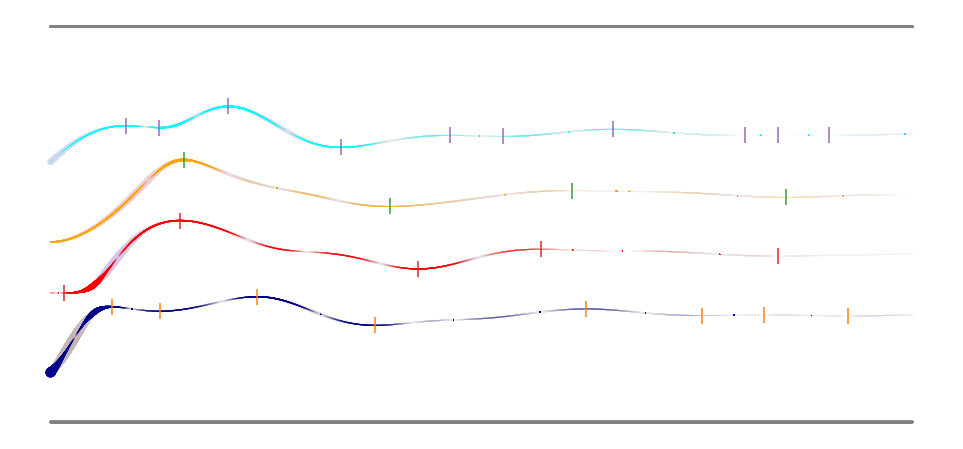

In [227]:
p0 = math.log(4 * 1, 2)
p1 = math.log(4 * 5/2, 2)
p2 = math.log(4 * 7/4, 2)
p3 = math.log(4 * 35/8, 2)

print(color.BOLD + color.BLUE + 'Starting positions (log_2):\n' + color.END, p0, '\n', p1, '\n', p2, '\n', p3)

P, Q, R = voice_leading_B(starting_positions = [1.5, p0, p1, p2, p3, 5.5],
                          starting_velocities = [0, 1, 0, 0, 1, 0],
                          point_masses = [5, 1, 1, 1, 1, 5],
                          field_strength = .6,
                          friction = .999)

Basic check that voice_leading_C works as inteded:

Starting positions (log_2):
 2.0 
 3.3219280948873626 
 2.807354922057604 
 4.129283016944967


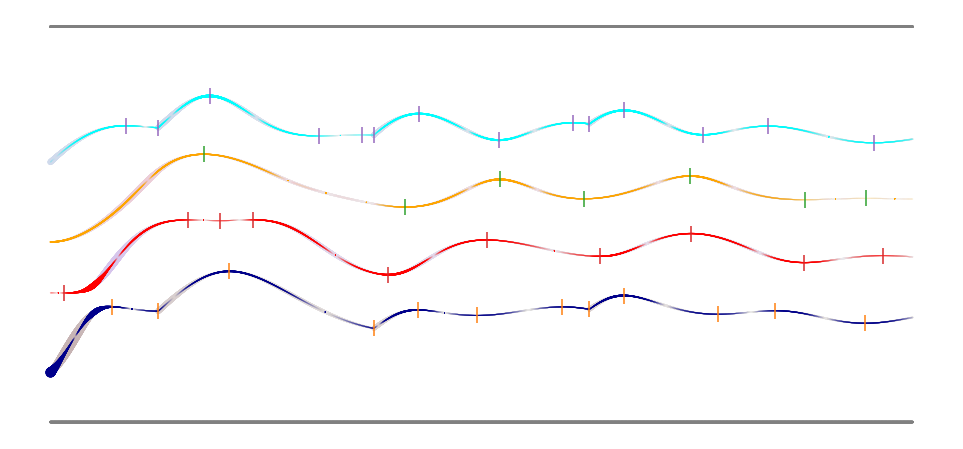

In [228]:
p0 = math.log(4 * 1, 2)
p1 = math.log(4 * 5/2, 2)
p2 = math.log(4 * 7/4, 2)
p3 = math.log(4 * 35/8, 2)

print(color.BOLD + color.BLUE + 'Starting positions (log_2):\n' + color.END, p0, '\n', p1, '\n', p2, '\n', p3)

P, Q, R = voice_leading_C(starting_positions = [1.5, p0, p1, p2, p3, 5.5],
                          starting_velocities = [0, 1, 0, 0, 1, 0],
                          point_masses = [5, 1, 1, 1, 1, 5],
                          field_strength = .6,
                          friction = .999,
                          change_steps = [1000, 3000, 5000],
                          velocity_changes = [[0, 1, 0, 0, 1, 0], [0, 1, 0, 0, 1, 0], [0, 1, 0, 0, 1, 0]])

Starting positions (log_2):
 0.0 
 0.5849625007211562 
 1.3219280948873624 
 1.9068905956085187


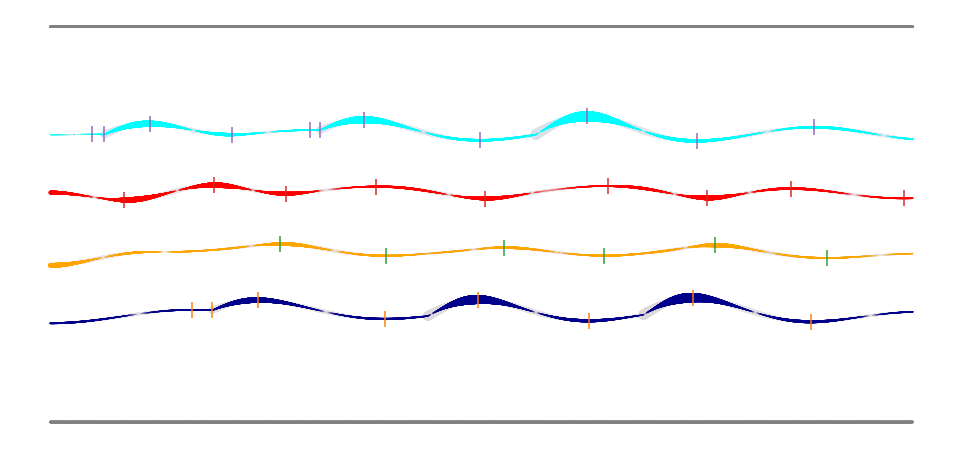

In [229]:
p0 = math.log(1, 2)
p1 = math.log(3/2, 2)
p2 = math.log(5/2, 2)
p3 = math.log(15/4, 2)

print(color.BOLD + color.BLUE + 'Starting positions (log_2):\n' + color.END, p0, '\n', p1, '\n', p2, '\n', p3)

P, Q, R = voice_leading_C(starting_positions = [-1, p0, p1, p2, p3, 3],
                          starting_velocities = [0, 0, 0, 0, 0, 0],
                          point_masses = [5, 1, 1, 1, 1, 5],
                          field_strength = .6,
                          friction = .999,
                          change_steps = [500+i * 1000 for i in range(6)],
                          velocity_changes = [[0, .5 * (i%2), 0, 0, .5 * ((i+1)%2), 0] for i in range(6)])

Starting positions (log_2):
 0.0 
 0.5849625007211562 
 1.3219280948873624 
 1.9068905956085187


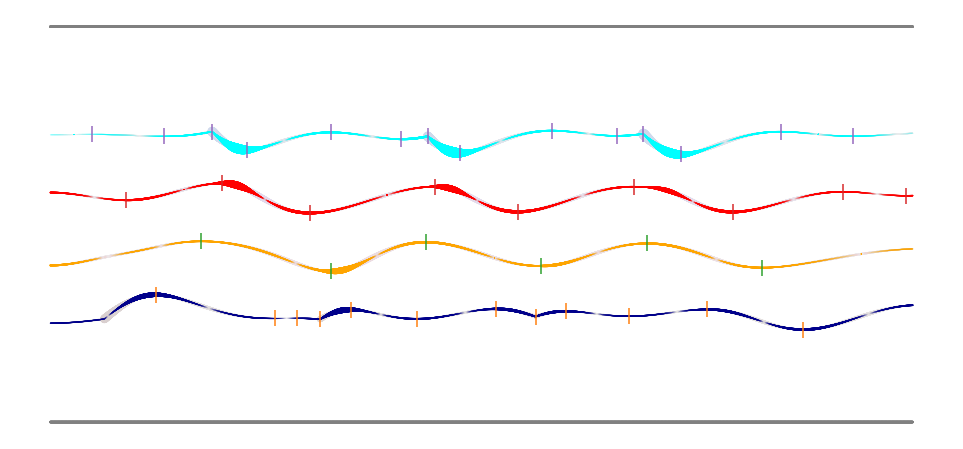

In [230]:
p0 = math.log(1, 2)
p1 = math.log(3/2, 2)
p2 = math.log(5/2, 2)
p3 = math.log(15/4, 2)

print(color.BOLD + color.BLUE + 'Starting positions (log_2):\n' + color.END, p0, '\n', p1, '\n', p2, '\n', p3)

P, Q, R = voice_leading_C(starting_positions = [-1, p0, p1, p2, p3, 3],
                          starting_velocities = [0, 0, 0, 0, 0, 0],
                          point_masses = [5, 1, 1, 1, 1, 5],
                          field_strength = .6,
                          friction = .999,
                          change_steps = [500+i * 1000 for i in range(6)],
                          velocity_changes = [[0, .75 * ((i+1)%2), 0, 0, -1.25 * ((i)%2), 0] for i in range(6)])

Starting positions (log_2):
 0.0 
 0.5849625007211562 
 1.3219280948873624 
 1.9068905956085187


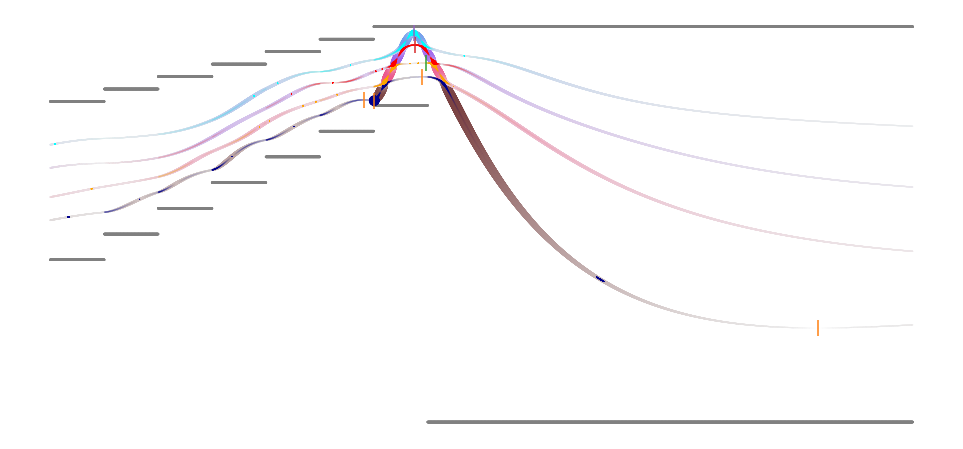

In [231]:
p0 = math.log(1, 2)
p1 = math.log(3/2, 2)
p2 = math.log(5/2, 2)
p3 = math.log(15/4, 2)

print(color.BOLD + color.BLUE + 'Starting positions (log_2):\n' + color.END, p0, '\n', p1, '\n', p2, '\n', p3)

P, Q, R = voice_leading_D(starting_positions = [-1, p0, p1, p2, p3, 3],
                          starting_velocities = [0, .5, .5, .5, .5, 0],
                          point_masses = [5, 1, 1, 1, 1, 5],
                          field_strength = .6,
                          friction = .999,
                          pos_change_steps = [500+i * 500 for i in range(7)],
                          position_changes = [[.65, 0, 0, 0, 0, .315] for i in range(6)] + [[-8, 0, 0, 0, 0, 0]],
                          change_steps = [],
                          velocity_changes = [])

Starting positions (log_2):
 0.0 
 0.5849625007211562 
 1.3219280948873624 
 1.9068905956085187


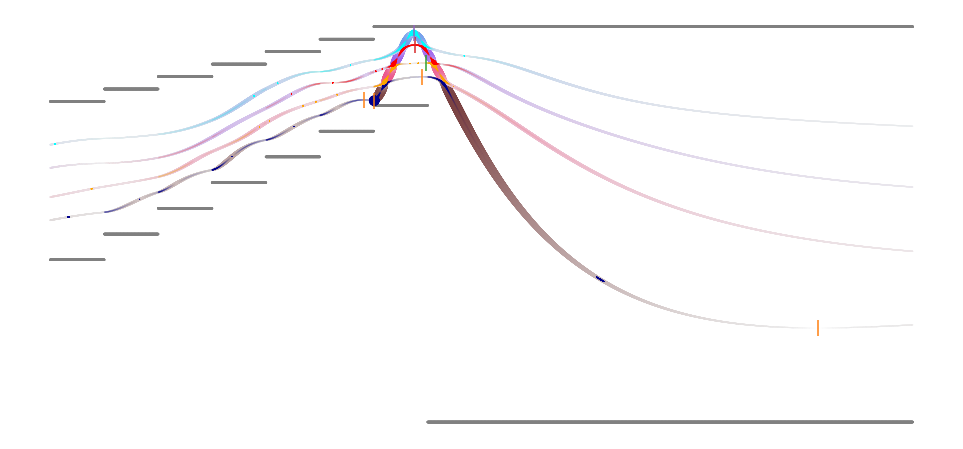

In [232]:
p0 = math.log(1, 2)
p1 = math.log(3/2, 2)
p2 = math.log(5/2, 2)
p3 = math.log(15/4, 2)

print(color.BOLD + color.BLUE + 'Starting positions (log_2):\n' + color.END, p0, '\n', p1, '\n', p2, '\n', p3)

P, Q, R = voice_leading_D(starting_positions = [-1, p0, p1, p2, p3, 3],
                          starting_velocities = [0, .5, .5, .5, .5, 0],
                          point_masses = [5, 1, 1, 1, 1, 5],
                          field_strength = .6,
                          friction = .999,
                          pos_change_steps = [500+i * 500 for i in range(7)],
                          position_changes = [[.65, 0, 0, 0, 0, .315] for i in range(6)] + [[-8, 0, 0, 0, 0, 0]],
                          change_steps = [],
                          velocity_changes = [])

Starting positions (log_2):
 0.0 
 0.5849625007211562 
 1.3219280948873624 
 1.9068905956085187


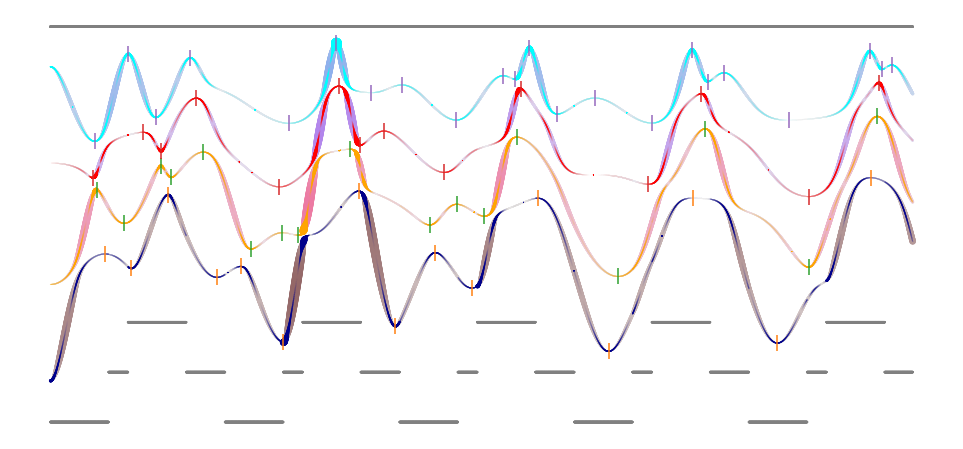

In [399]:
p0 = math.log(1, 2)
p1 = math.log(3/2, 2)
p2 = math.log(5/2, 2)
p3 = math.log(15/4, 2)

print(color.BOLD + color.BLUE + 'Starting positions (log_2):\n' + color.END, p0, '\n', p1, '\n', p2, '\n', p3)

pos_change_steps = []
position_changes = []
position = 0
change = 0
for i in range(30):
    position += (i%2)*360 + ((i+1)%2)*180
    pos_change_steps.append(position)
for i in range(100):
    change = .35 * np.sin(2*np.pi*i/6)
    position_changes.append([change, 0, 0, 0, 0, 0])
                            
P, Q, R = voice_leading_D(starting_positions = [-.25, p0, p1, p2, p3, 2.15],
                          starting_velocities = [0, 0, 0, 0, 0, 0],
                          point_masses = [5, .75, .75, .75, .75, 2],
                          field_strength = .6,
                          friction = .999,
                          pos_change_steps = pos_change_steps,
                          position_changes = position_changes,
                          change_steps = [],
                          velocity_changes = [])

Starting positions (log_2):
 0.10416666666666666 
 0.6891291673878228 
 1.4260947615540291 
 2.240223928941852


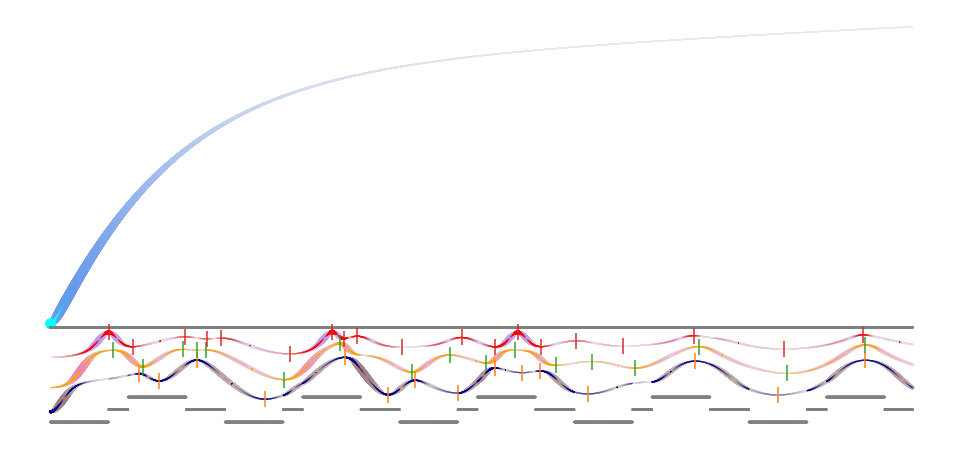

In [521]:
p0 = (5/4)*(1/12) + math.log(1, 2)
p1 = (5/4)*(1/12) + math.log(3/2, 2)
p2 = (5/4)*(1/12) + math.log(5/2, 2)
p3 = 1/3 + math.log(15/4, 2)

print(color.BOLD + color.BLUE + 'Starting positions (log_2):\n' + color.END, p0, '\n', p1, '\n', p2, '\n', p3)

pos_change_steps = []
position_changes = []
position = 0
change = 0
for i in range(30):
    position += (i%2)*360 + ((i+1)%2)*180
    pos_change_steps.append(position)
for i in range(100):
    change = .35 * np.sin(2*np.pi*i/6)
    position_changes.append([change, 0, 0, 0, 0, 0])
                            
P, Q, R = voice_leading_D(starting_positions = [(5/4)*(1/12) - .25, p0, p1, p2, p3, 2.15],
                          starting_velocities = [0, 0, 0, 0, 0, 0],
                          point_masses = [7, 2, 2, 2, .75, 2],
                          field_strength = .6,
                          friction = .999,
                          pos_change_steps = pos_change_steps,
                          position_changes = position_changes,
                          change_steps = [],
                          velocity_changes = [])

Starting positions (log_2):
 0.0 
 0.5849625007211562 
 1.3219280948873624 
 1.9068905956085187


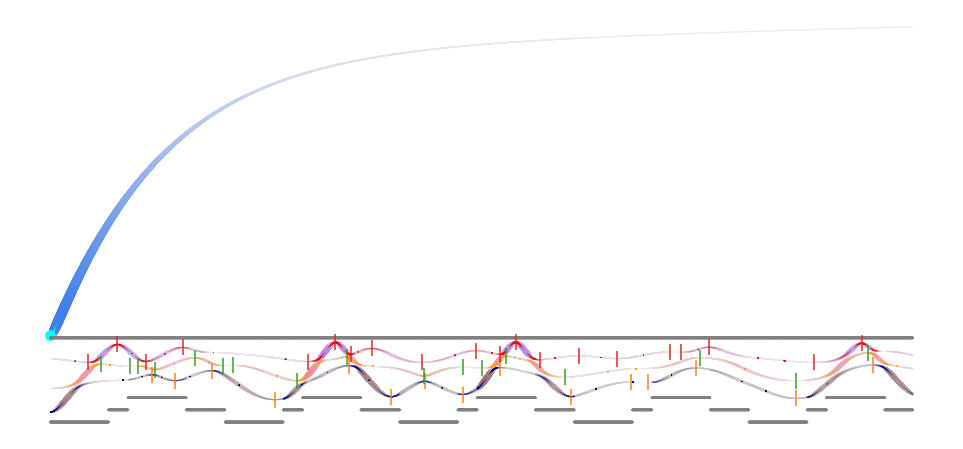

In [459]:
p0 = math.log(1, 2)
p1 = math.log(3/2, 2)
p2 = math.log(5/2, 2)
p3 = math.log(15/4, 2)

print(color.BOLD + color.BLUE + 'Starting positions (log_2):\n' + color.END, p0, '\n', p1, '\n', p2, '\n', p3)

pos_change_steps = []
position_changes = []
position = 0
change = 0
for i in range(30):
    position += (i%2)*360 + ((i+1)%2)*180
    pos_change_steps.append(position)
for i in range(100):
    change = .35 * np.sin(2*np.pi*i/6)
    position_changes.append([change, 0, 0, 0, 0, 0])

P, Q, R = voice_leading_D(starting_positions = [-.25, p0, p1, p2, p3, 1.85],
                          starting_velocities = [0, 0, 0, 0, 0, 0],
                          point_masses = [5, .75, .75, .75, .75, 2],
                          field_strength = .6,
                          friction = .999,
                          pos_change_steps = pos_change_steps,
                          position_changes = position_changes,
                          change_steps = [],
                          velocity_changes = [])

Starting positions (log_2):
 0.1111111111111111 
 0.6960736118322672 
 1.4330392059984736 
 2.01800170671963


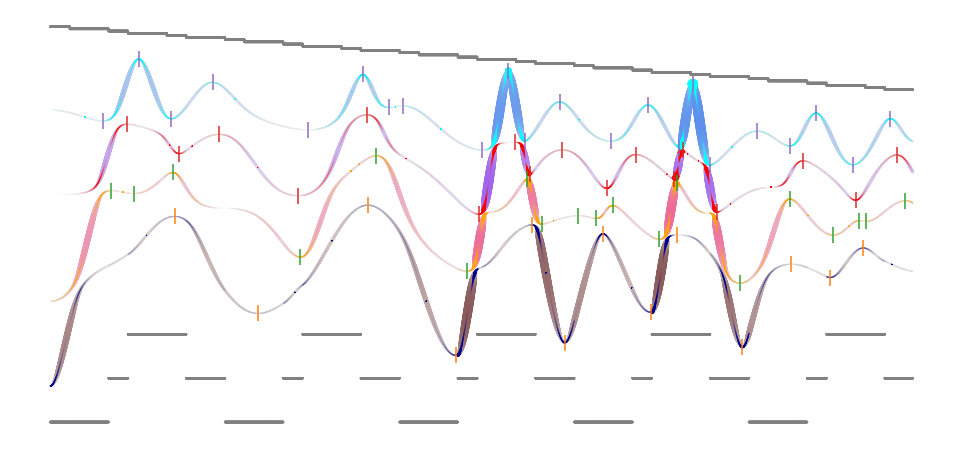

In [690]:
p0 = (4/3)*(1/12) + math.log(1, 2)
p1 = (4/3)*(1/12) + math.log(3/2, 2)
p2 = (4/3)*(1/12) + math.log(5/2, 2)
p3 = (4/3)*(1/12) + math.log(15/4, 2)

print(color.BOLD + color.BLUE + 'Starting positions (log_2):\n' + color.END, p0, '\n', p1, '\n', p2, '\n', p3)

pos_change_steps = []
position_changes = []
position = 0
change = 0
for i in range(30):
    position += (i%2)*360 + ((i+1)%2)*180
    pos_change_steps.append(position)
for i in range(100):
    change = .35 * np.sin(2*np.pi*i/6)
    change_2 = -.015
    position_changes.append([change, 0, 0, 0, 0, change_2])
                            
P, Q, R = voice_leading_D(starting_positions = [(4/3)*(1/12) + -.25, p0, p1, p2, p3, (16/3)*(1/12) + 2.15],
                          starting_velocities = [0, 0, 0, 0, 0, 0],
                          point_masses = [5, .75, .75, .75, .75, 2],
                          field_strength = .6,
                          friction = .999,
                          pos_change_steps = pos_change_steps,
                          position_changes = position_changes,
                          change_steps = [],
                          velocity_changes = [])

Starting positions (log_2):
 0.0 
 0.5849625007211562 
 1.3219280948873624 
 1.9068905956085187


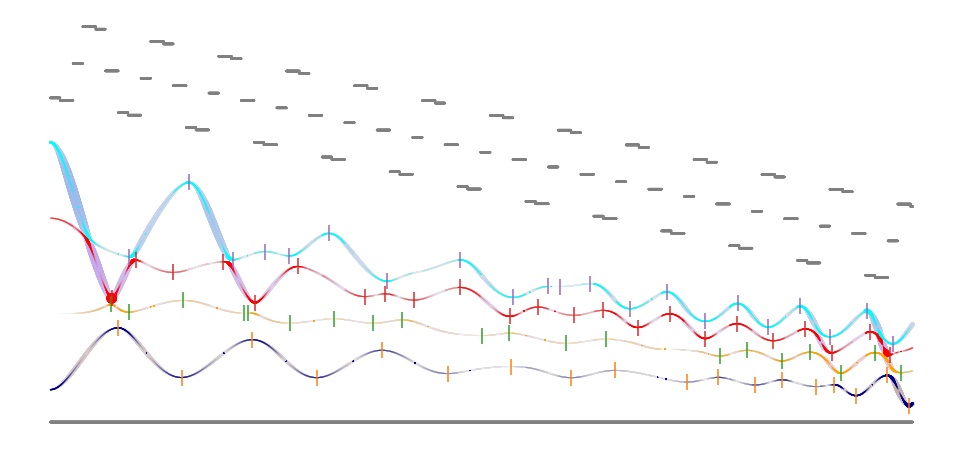

In [440]:
p0 = math.log(1, 2)
p1 = math.log(3/2, 2)
p2 = math.log(5/2, 2)
p3 = math.log(15/4, 2)

print(color.BOLD + color.BLUE + 'Starting positions (log_2):\n' + color.END, p0, '\n', p1, '\n', p2, '\n', p3)

pos_change_steps = []
position_changes = []
position = 0
change = 0
for i in range(90):
    position += (i%2)*120 + ((i+1)%2)*90
    pos_change_steps.append(position)
for i in range(100):
    change = -.019 +.35 * np.sin(2*np.pi*i/6)
    position_changes.append([0, 0, 0, 0, 0, change])

P, Q, R = voice_leading_D(starting_positions = [-.25, p0, p1, p2, p3, 2.25],
                          starting_velocities = [0, 0, 0, 0, 0, 0],
                          point_masses = [1, .25, .25, .1, .1, 5],
                          field_strength = .6,
                          friction = .999,
                          pos_change_steps = pos_change_steps,
                          position_changes = position_changes,
                          change_steps = [],
                          velocity_changes = [])

Starting positions (log_2):
 0.10416666666666666 
 0.6891291673878228 
 1.288594761554029 
 1.8735572622751853


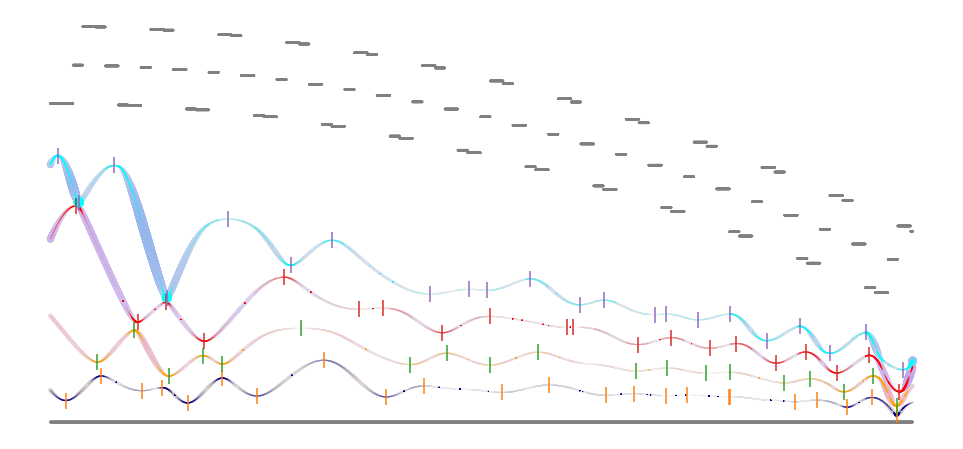

In [657]:
p0 = (5/4)*(1/12) + math.log(1, 2)
p1 = (5/4)*(1/12) + math.log(3/2, 2)
p2 = -(2/5)*(1/12) + math.log(5/2, 2)
p3 = -(2/5)*(1/12) + math.log(15/4, 2)

print(color.BOLD + color.BLUE + 'Starting positions (log_2):\n' + color.END, p0, '\n', p1, '\n', p2, '\n', p3)

pos_change_steps = []
position_changes = []
position = 0
change = 0
for i in range(90):
    position += (i%2)*120 + ((i+1)%2)*90
    pos_change_steps.append(position)
for i in range(100):
    change = -.00055*(i+1) +.35 * np.sin(2*np.pi*i/6)
    position_changes.append([0, 0, 0, 0, 0, change])

P, Q, R = voice_leading_D(starting_positions = [(5/4)*(1/12) + -.25, p0, p1, p2, p3, (5/4)*(1/12) + 2.25],
                          starting_velocities = [0, -1, -1, 2, 2, 0],
                          point_masses = [.5, .25, .25, .25, .1, 9],
                          field_strength = .6,
                          friction = .999,
                          pos_change_steps = pos_change_steps,
                          position_changes = position_changes,
                          change_steps = [],
                          velocity_changes = [])

Starting positions (log_2):
 0.1111111111111111 
 0.6960736118322672 
 1.4330392059984736 
 2.01800170671963


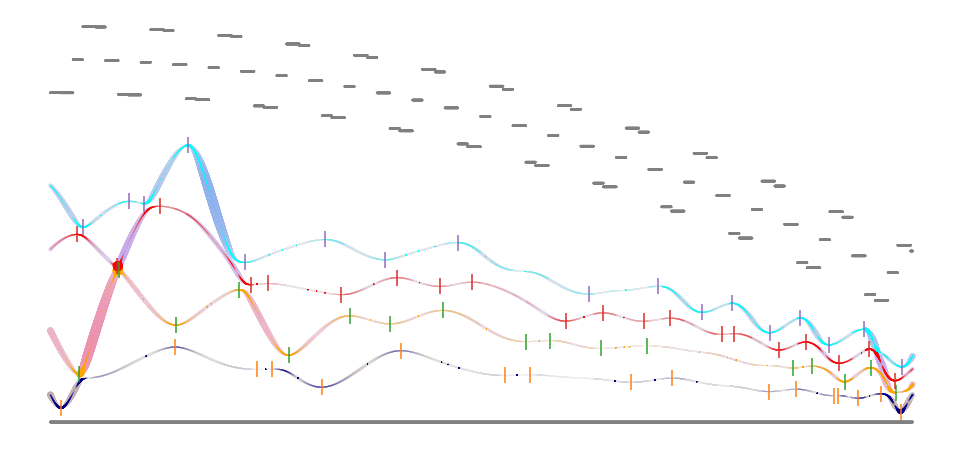

In [722]:
p0 = (4/3)*(1/12) + math.log(1, 2)
p1 = (4/3)*(1/12) + math.log(3/2, 2)
p2 = (4/3)*(1/12) + math.log(5/2, 2)
p3 = (4/3)*(1/12) + math.log(15/4, 2)

print(color.BOLD + color.BLUE + 'Starting positions (log_2):\n' + color.END, p0, '\n', p1, '\n', p2, '\n', p3)

pos_change_steps = []
position_changes = []
position = 0
change = 0
for i in range(90):
    position += (i%2)*120 + ((i+1)%2)*90
    pos_change_steps.append(position)
for i in range(100):
    change = -.0007*(i+1) +.35 * np.sin(2*np.pi*i/6)
    position_changes.append([0, 0, 0, 0, 0, change])

P, Q, R = voice_leading_D(starting_positions = [(4/3)*(1/12) + -.25, p0, p1, p2, p3, (4/3)*(1/12) + 2.75],
                          starting_velocities = [0, -2, -2, 1, -1, 0],
                          point_masses = [.9, .5, .25, .25, .1, 9],
                          field_strength = .6,
                          friction = .999,
                          pos_change_steps = pos_change_steps,
                          position_changes = position_changes,
                          change_steps = [],
                          velocity_changes = [])

In [351]:
P.pop(5)
P.pop(0)
print(len(P))

Q.pop(5)
Q.pop(0)
print(len(Q))

R.pop(5)
R.pop(0)
print(len(R))

4
4
4


In [723]:
divisor_array = np.array([[2**(i) * 3**(j) for i in range(2, 4)] for j in range(1, 4)])
divisor_list = divisor_array.flatten()

#divisor_list = []
#for row in divisor_array:
#    divisor_list = divisor_list + row
    
divisor_list.sort()
print(color.BOLD + color.BLUE + '\nList of allowed divisors of one beat, sorted by size:\n' + color.END, divisor_list)

duration_list = [1/div for div in divisor_list]
duration_list.sort()
print(color.BOLD + color.BLUE + '\nList of allowed durations (in beats), sorted by size:\n' + color.END, duration_list)

reversed_duration_list = copy.deepcopy(duration_list)
reversed_duration_list.reverse()
reversed_duration_list = [8 * d for d in reversed_duration_list]


List of allowed divisors of one beat, sorted by size:
 [ 12  24  36  72 108 216]

List of allowed durations (in beats), sorted by size:
 [0.004629629629629629, 0.009259259259259259, 0.013888888888888888, 0.027777777777777776, 0.041666666666666664, 0.08333333333333333]


In [724]:
divisor_array = np.array([3**2 * 1 * 2**2,
                          2**3 * 1 * 2**2,
                          3**2 * 1 * 3**1,
                          3**2 * 2 * 2**1,
                          2**3 * 2 * 2**1,
                          3**2 * 2 * 3**2,
                          3**2 * 1 * 2**3,
                          2**3 * 1 * 2**3,
                          3**2 * 1 * 3**2,
                          3**2 * 2 * 2**3,
                          2**3 * 2 * 2**3,
                          3**2 * 2 * 3**2,])
divisor_list = divisor_array.flatten()

#divisor_list = []
#for row in divisor_array:
#    divisor_list = divisor_list + row
    
divisor_list.sort()
print(color.BOLD + color.BLUE + '\nList of allowed divisors of one beat, sorted by size:\n' + color.END, divisor_list)

duration_list = [1/div for div in divisor_list]
duration_list.sort()
print(color.BOLD + color.BLUE + '\nList of allowed durations (in beats), sorted by size:\n' + color.END, duration_list)

reversed_duration_list = copy.deepcopy(duration_list)
reversed_duration_list.reverse()
reversed_duration_list = [8 * d for d in reversed_duration_list]


List of allowed divisors of one beat, sorted by size:
 [ 27  32  32  36  36  64  72  81 128 144 162 162]

List of allowed durations (in beats), sorted by size:
 [0.006172839506172839, 0.006172839506172839, 0.006944444444444444, 0.0078125, 0.012345679012345678, 0.013888888888888888, 0.015625, 0.027777777777777776, 0.027777777777777776, 0.03125, 0.03125, 0.037037037037037035]


In [725]:
duration_list = [3**i for i in range(-5, -2)]
print(color.BOLD + color.BLUE + '\nList of allowed durations (in beats), sorted by size:\n' + color.END, duration_list)

reversed_duration_list = copy.deepcopy(duration_list)
reversed_duration_list.reverse()
reversed_duration_list = [8 * d for d in reversed_duration_list]


List of allowed durations (in beats), sorted by size:
 [0.00411522633744856, 0.012345679012345678, 0.037037037037037035]


In [726]:
length = len(duration_list)

def approximate_duration(n):
    approx_d = 0.0
    n = abs(n)
    for d in duration_list:
        if n >= d:
            index = duration_list.index(d)
            approx_d = reversed_duration_list[index]
        else:
            pass
    
    return approx_d

In [727]:
bias = .1

def individual_durations(Q):
    max_speed = 0
    for velocity_line in Q:
        speed_line = [abs(bias+v) for v in velocity_line]
        line_max = max(speed_line)
        max_speed = max(max_speed, line_max)
    
    normalized_velocities = []
    for velocity_line in Q:
        normalized_line = [(bias+v)/max_speed for v in velocity_line]
        normalized_velocities.append(copy.deepcopy(normalized_line))
    
    durations = []
    for normalized_line in normalized_velocities:
        duration_line = [approximate_duration(n) for n in normalized_line]
        durations.append(copy.deepcopy(duration_line))
    
    return durations

In [728]:
print(len(individual_durations(Q)))

6


In [729]:
def expand_durations(D):
    expanded = []
    for line in D:
        part = []
        running_index = 1
        L = len(line)
        while running_index < L:
            duration = line[running_index]
            if duration == 0.0:
                running_index = running_index + 1
            else:
                part.append((copy.deepcopy(duration),
                             copy.deepcopy(running_index)))
                ticks = int(duration/base_duration)
                running_index = running_index + ticks
        expanded.append(copy.deepcopy(part))
        
    return expanded

In [730]:
D = individual_durations(Q)
durations_and_ticks = expand_durations(D)
for i in range(len(durations_and_ticks)):
    line = durations_and_ticks[i]
    print(color.BOLD + color.BLUE + '\nLength of line {} (in index ticks):'.format(i) + color.END, len(line))
print('')


Length of line 0 (in index ticks): 82

Length of line 1 (in index ticks): 132

Length of line 2 (in index ticks): 184

Length of line 3 (in index ticks): 166

Length of line 4 (in index ticks): 193

Length of line 5 (in index ticks): 82



In [731]:
bias = .1

def individual_volumes(Q):
    max_speed = 0
    for velocity_line in Q:
        speed_line = [abs(bias + v) for v in velocity_line]
        line_max = max(speed_line)
        max_speed = max(max_speed, line_max)

    normalized_velocities = []
    for velocity_line in Q:
        normalized_line = [(bias + v)/max_speed for v in velocity_line]
        normalized_velocities.append(copy.deepcopy(normalized_line))

    volumes = []
    for normalized_line in normalized_velocities:
        volume_line = [int(abs(n * 127)) for n in normalized_line]
        volumes.append(copy.deepcopy(volume_line))
  
    return volumes

In [732]:
print(len(individual_volumes(Q)))

6


In [733]:
pitches = P
durations_and_ticks = expand_durations(D)
volumes = individual_volumes(Q)

thinned_pitches = []
thinned_volumes = []
for i in range(len(pitches)):
    pitch_line = P[i]
    volume_line = volumes[i]
    duration_and_tick_line = durations_and_ticks[i]
    
    thinned_pitch_line = []
    thinned_volume_line = []
    for pair in duration_and_tick_line:
        tick = pair[1]

        pitch = pitch_line[tick]
        thinned_pitch_line.append(copy.deepcopy(pitch))

        volume = volume_line[tick]
        thinned_volume_line.append(copy.deepcopy(volume))

    thinned_pitches.append(copy.deepcopy(thinned_pitch_line))
    thinned_volumes.append(copy.deepcopy(thinned_volume_line))

In [734]:
print('')
    
for line in thinned_pitches:
    print(len(line))

print('')
    
for line in thinned_volumes:
    print(len(line))


82
132
184
166
193
82

82
132
184
166
193
82


In [735]:
pitches = thinned_pitches
volumes = thinned_volumes

durations = []
for line in durations_and_ticks:
    duration_line = [pair[0] for pair in line]
    durations.append(copy.deepcopy(duration_line))

In [736]:
len(pitches) == len(durations) == len(volumes)

True

In [737]:
tonic = 523.25
interval = 2

MIDI_score = []
for i in range(len(pitches)):
    MIDI_line = []
    
    pitch_line = pitches[i]
    duration_line = durations[i]
    volume_line = volumes[i]
    
    for j in range(len(pitch_line)):
        position = pitch_line[j]
        frequency = tonic * (interval)**position
        MIDI_note, MIDI_wheel = Hz_to_MIDI(frequency)

        MIDI_velocity = volume_line[j]
        
        MIDI_duration = duration_line[j]

        MIDI_quad = (MIDI_note,
                     MIDI_wheel,
                     MIDI_velocity,
                     MIDI_duration)

        MIDI_line.append(copy.deepcopy(MIDI_quad))
        
    MIDI_score.append(copy.deepcopy(MIDI_line))

In [738]:
for line in MIDI_score:
    print(len(line))

82
132
184
166
193
82


In [739]:
2**4/3**4

0.19753086419753085

**REMEMBER TO CHANGE `file_name`!!!** **REMEMBER TO CHANGE `file_name`!!!** **REMEMBER TO CHANGE `file_name`!!!**

**REMEMBER TO CHANGE `file_name`!!!** **REMEMBER TO CHANGE `file_name`!!!** **REMEMBER TO CHANGE `file_name`!!!**

**REMEMBER TO CHANGE `file_name`!!!** **REMEMBER TO CHANGE `file_name`!!!** **REMEMBER TO CHANGE `file_name`!!!**

In [740]:
line_number = 0
for line in MIDI_score:
    track_name = 'trap_013_{}'.format(line_number)

    globals()[track_name] = MIDIFile(numTracks = 1,
                                     removeDuplicates = False,
                                     deinterleave = True,
                                     adjust_origin = False,
                                     file_format = 1,
                                     ticks_per_quarternote = 960,
                                     eventtime_is_ticks = False)

    globals()[track_name].addNote(track = 0,
                                  channel = 1,
                                  pitch = 69,
                                  time = 0,
                                  duration = 0.5,
                                  volume = 50)

    onset_time = 1
    for MIDI_quad in line:
        MIDI_note, pitchwheel_value, velocity, duration = MIDI_quad
        
        duration = 16 * duration

#        if velocity == 0:
#            pass
#        else:
        globals()[track_name].addNote(track = 0,
                                      channel = 1,
                                      pitch = MIDI_note,
                                      time = onset_time,
                                      duration = 0.95 * duration,
                                      volume = velocity)

        globals()[track_name].addPitchWheelEvent(track = 0,
                                                 channel = 1,
                                                 time = onset_time,
                                                 pitchWheelValue = pitchwheel_value)
            
        onset_time = onset_time + duration

    with open('{}.midi'.format(track_name), 'wb') as output_file:
        globals()[track_name].writeFile(output_file)

    print(color.BOLD + color.BLUE + '\nMIDI file saved as:' + color.END, '{}.midi'.format(track_name))
    
    line_number = line_number + 1


MIDI file saved as: trap_013_0.midi

MIDI file saved as: trap_013_1.midi

MIDI file saved as: trap_013_2.midi

MIDI file saved as: trap_013_3.midi

MIDI file saved as: trap_013_4.midi

MIDI file saved as: trap_013_5.midi


___

## Fourier version.

### Building the individual voices.

In [379]:
def Fourier(tonic: float,
            sin_coeffs: list,
            cos_coeffs: list,
            t_start: float,
            t_stop: float,
            file_name: str,
            sample_rate: int):

    assert type(tonic) == float
    assert type(sin_coeffs) == list
    assert type(cos_coeffs) == list
    assert type(t_start) == type(t_stop) == float
    assert t_stop > t_start
    assert type(file_name) == str
    
    duration = t_stop - t_start
    num = int(sample_rate * duration)
    
    wav_amplitude = np.iinfo(np.int32).max
    
    T = np.linspace(t_start, t_stop, num = num)
    
    F = []
    
    for t in tqdm(T):
        arg = tonic * t
        
        value = 0.0
        for a in sin_coeffs:
            multiplier = sin_coeffs.index(a)+1
            sin_term = a(t) * np.sin(2 * np.pi * multiplier * arg)
            value = value + sin_term
        for b in cos_coeffs:
            multiplier = cos_coeffs.index(b)
            cos_term = b(t) * np.cos(2 * np.pi * multiplier * arg)
            value = value + cos_term
        
        F.append(value)
        
    F = np.array(F)
    max_amp = np.amax(np.absolute(F))
    F = F/max_amp
    F = wav_amplitude * F
    
    #for a in sin_coeffs:
    write('{}.wav'.format(file_name), sample_rate, F.astype(np.int32))
    
    output = print(color.BOLD + color.BLUE + 'Fourier series printed as \"' + color.END, '{}.wav'.format(file_name), color.BOLD + color.BLUE + '\".' + color.END)
        
    return output

In [380]:
for n in range(1, 6):
    function_name = 'a_{}'.format(n)
    globals()[function_name] = lambda t: (1/(n)) * (1 + np.sin((2*np.pi/5) * (n**2) * t))

In [381]:
a_2(1.5)

0.20000000000000107

In [382]:
Fourier(100.0, [a_1, a_2, a_3, a_4, a_5], [], 0.0, 10.0, "trial", 441000)

100%|██████████| 4410000/4410000 [01:04<00:00, 68819.73it/s]


Fourier series printed as " trial.wav ".


In [383]:
73/60

1.2166666666666666

In [384]:
m = 7

a_1 = lambda t: (1/3) * (1 + np.sin(2*np.pi * ((75)/60) * t)) + (1/4) * (1 + np.sin(2*np.pi * ((125+m)/60) * t))
a_2 = lambda t: (1/4) * (1 + np.sin(2*np.pi * ((100+m)/60) * t)) + (1/4) * (1 + np.sin(2*np.pi * ((175+m)/60) * t))
a_3 = lambda t: (1/9) * (1 + np.sin(2*np.pi * ((225+m)/60) * t)) + (1/4) * (1 + np.sin(2*np.pi * ((325+m)/60) * t))

Fourier(110.0, [a_1, a_2, a_3], [], 0.0, 30.0, "trial", 441000)

100%|██████████| 13230000/13230000 [02:39<00:00, 82962.35it/s]


Fourier series printed as " trial.wav ".


**Note.** Make each `a_n` more complex. Specifically, for the `a_n`'s above, do things like replace `a_1` with `a_1+a_2+a_3`, and so on. The point is to get more complex wobbles in each component tone of the Fourier series.
**—✓**

**Note.** The strict periodicity is a bit... impersonal. Try choosing large-scale oscillations from $\mathbb{R}\smallsetminus\mathbb{Q}$, i.e., *irrational* in the mathematical sense. (In musical vocabulary, *irrational* means $\mathbb{R}\smallsetminus\mathbb{Z}[\frac{1}{2}]$.
**—✓**

In [385]:
freq = 10

for n in range(1, 24):
    m = random.randint(2, 11)
    fractions = [4/3, 3/4, 5/4, 6/5, 9/4, 3/2, 5/2]
    M = random.choice(fractions)
    fractions.remove(M)
    N = random.choice(fractions)
    
    Z = [0.1, 0.2, 1, 1.5, 2, 3]
    val = n**(1/5)
    lav = random.choice(Z) * n**((40+m)/50)
    
    globals()['a_{}'.format(n)] = lambda t: (1/lav) * ((1 + np.sin(2*np.pi * ((val*M*freq+m)/60) * t)) + (1/2) * (1 + np.sin(2*np.pi * ((val*N*freq+m)/60) * t)))
    
Fourier(110.0, [a_1,
                a_2,
                a_3,
                a_4,
                a_5,
                a_6,
                a_7,
                a_8,
                a_9,
                a_10,
                a_11,
                a_12,
                a_13,
                a_14,
                a_15,
                a_16,
                a_17,
                a_18,
                a_19,
                a_20,
                a_21,
                a_22,
                a_23], [], 0.0, 20.0, "trial_X", 441000)


100%|██████████| 8820000/8820000 [14:03<00:00, 10462.06it/s]


Fourier series printed as " trial_X.wav ".


In [387]:
def raw_voice_leading(starting_velocities, point_masses):
    number_of_steps = 8000

    factors = []
    for i in range(4):
        for j in range(4):
            factors.append(2**i * 5**j)

    factors.sort()

    durations = [1/divisor for divisor in factors]
    durations.sort()

    step_duration = durations[0]

    initial_state = State(time = 0.0,
                          masses = point_masses,
                          positions = [0,1,2,3,4,5],
                          velocities = starting_velocities,
                          fixed = [0, 5])

    state_list = [initial_state]
    for i in range(number_of_steps):
        state = state_list[i]
        new_state = state.time_step(duration = step_duration,
                                    force_field = vector_field,
                                    field_strength = .8,
                                    friction = .999)
        state_list.append(copy.deepcopy(new_state))

    position_evol = []
    for state in state_list:
        positions = state.positions
        #velocities = state.velocities
        position_evol.append([copy.deepcopy(positions),
                              #copy.deepcopy(velocities)
                             ])

    individual_evols = []
    for k in range(6):
        this_evol = []
        for positions in position_evol:
            position = positions[0][k]
            this_evol.append(copy.deepcopy(position))
        individual_evols.append(copy.deepcopy(this_evol))
        
    velocity_evol = []
    for state in state_list:
        velocities = state.velocities
        #velocities = state.velocities
        velocity_evol.append([copy.deepcopy(velocities)
                             ])
        
    max_velocity = max([max([abs(velocity) for velocity in state.velocities]) for state in state_list])
        
    individual_velocities = []
    for k in range(6):
        this_evol = []
        for velocities in velocity_evol:
            #if max_velocity != .0:
            #     velocities[0][k] = velocities[0][k]/max_velocity
            velocity = velocities[0][k]
            this_evol.append(copy.deepcopy(velocity))
        individual_velocities.append(copy.deepcopy(this_evol))
        
    acceleration_evol = []
    for state in state_list:
        accelerations = state.accelerations
        acceleration_evol.append([copy.deepcopy(accelerations)])
        
    max_accel = max([max([abs(acceleration) for acceleration in state.accelerations]) for state in state_list])
        
    individual_accelerations = []
    for k in range(6):
        this_evol = []
        for accelerations in acceleration_evol:
            if max_accel != .0:
                 accelerations[0][k] = accelerations[0][k]/max_accel
            acceleration = accelerations[0][k]
            this_evol.append(copy.deepcopy(acceleration))
        individual_accelerations.append(copy.deepcopy(this_evol))
        
    for state in state_list:
        accelerations = state.accelerations
        acceleration_evol.append([copy.deepcopy(accelerations)])
    
    return individual_evols, individual_velocities, individual_accelerations

### Building intrpolating function.

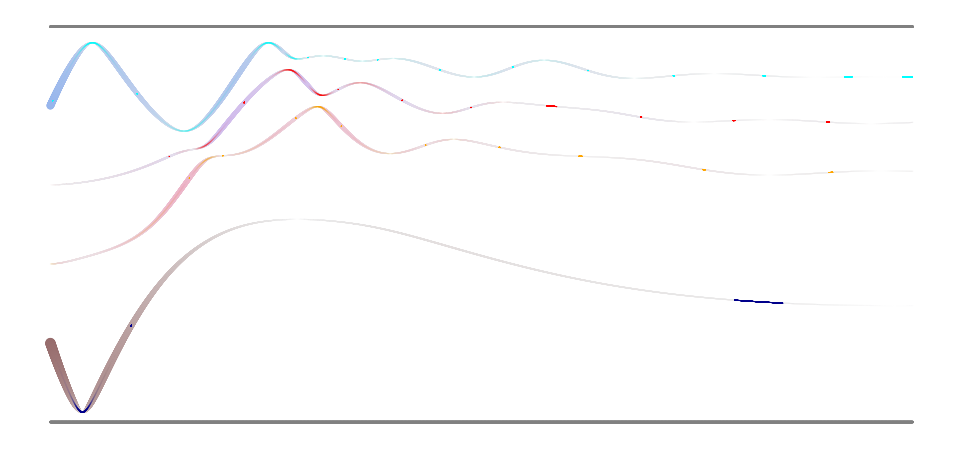

In [388]:
P, Q, R = voice_leading([0, -4, 0, 0, 3, 0], [1, 5, .5, .5, .5, 1])

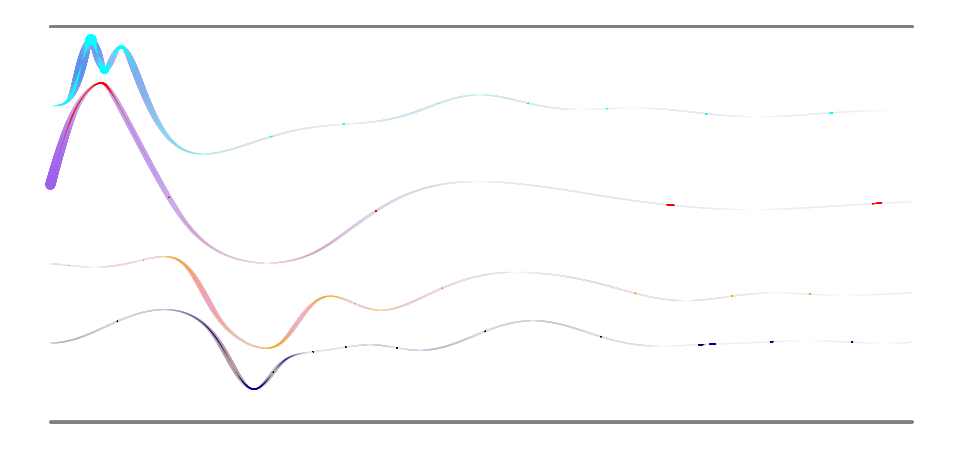

In [389]:
P, Q, R = voice_leading([0, 0, 0, 5, 0, 0], [5, 1, 1, 5, 1, 5])

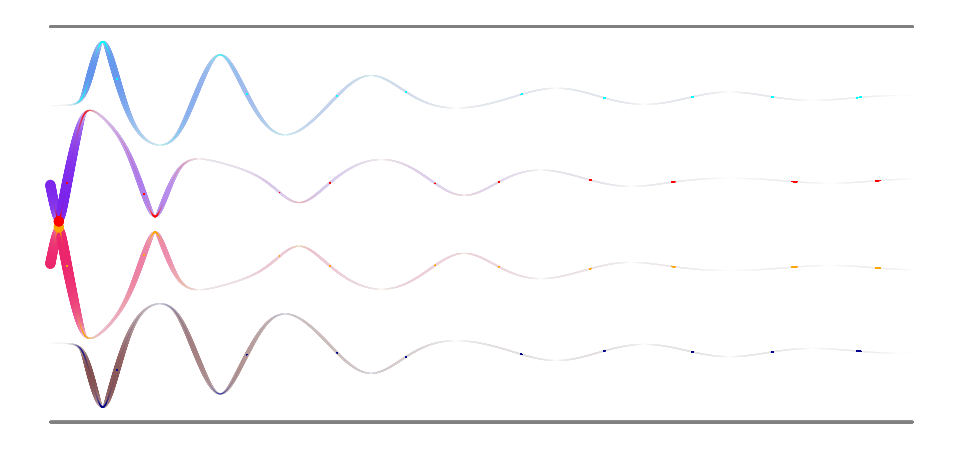

In [390]:
P, Q, R = voice_leading([0, 0, 7, -7, 0, 0], [5, 5, 5, 5, 5, 5])

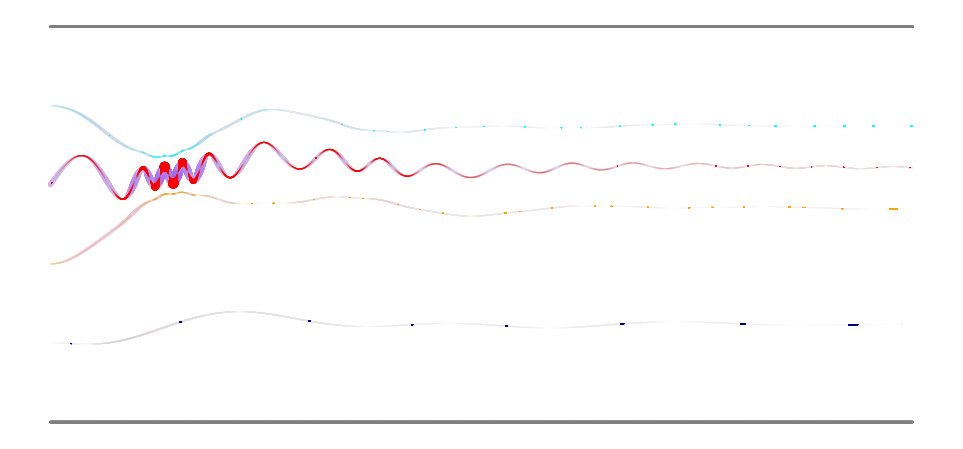

In [391]:
P, Q, R = voice_leading([0, 0, 0, 2, 0, 0], [5, 5, 5, -0.7, 5, 5])

Starting positions (log_2):
 -0.25000000000000006 
 0.1666666666666667 
 0.5833333333333334 
 0.75


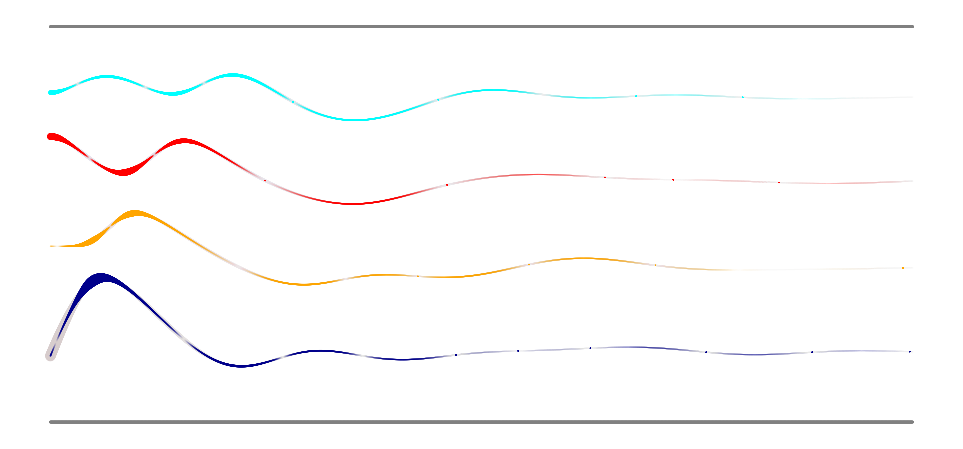

In [412]:
p0 = math.log(2**(-3/12), 2)
p1 = math.log(2**(2/12), 2)
p2 = math.log(2**(7/12), 2)
p3 = math.log(2**(9/12), 2)

print(color.BOLD + color.BLUE + 'Starting positions (log_2):\n' + color.END, p0, '\n', p1, '\n', p2, '\n', p3)

P, Q, R = voice_leading_B(starting_positions = [-.5, p0, p1, p2, p3, 1],
                          starting_velocities = [0, 1, 0, 0, 0, 0],
                          point_masses = [.1, .1, .1, .1, .1, .1],
                          field_strength = .6,
                          friction = .999)

In [413]:
print(len(P))
P.pop(0)
print(len(P))
P.pop(-1)
print(len(P))

6
5
4


In [414]:
slope = 0.5

print('\n', P[0][0])
print(P[3][0])

for i in range(len(P)):
    line = P[i]
    replacement = [slope * pos for pos in tqdm(line)]
    P[i] = replacement
    
print('\n', P[0][0])
print(P[3][0], '\n')

100%|██████████| 8001/8001 [00:00<00:00, 2002304.67it/s]


 -0.25000000000000006
0.75

 -0.12500000000000003
0.375 



In [415]:
len(P[1])

8001

In [416]:
sample_rate = 441000
print(color.BOLD + color.BLUE + '\nSample rate:' + color.END, sample_rate, 'samples per second')

duration = 10.0
print(color.BOLD + color.BLUE + 'Signal duration:' + color.END, duration, 'seconds')

sample_count = int(duration * sample_rate)
print(color.BOLD + color.BLUE + 'Sample count:' + color.END, sample_count, 'samples')

intrp_pnt_cnt = len(P[1])
intrp_smpl_rate = intrp_pnt_cnt/sample_count
print(color.BOLD + color.BLUE + 'Interpolation sample rate:' + color.END, intrp_smpl_rate, 'samples')

Delta_t = duration/intrp_pnt_cnt
print(color.BOLD + color.BLUE + 'Δt:' + color.END, Delta_t, 'seconds')


Sample rate: 441000 samples per second
Signal duration: 10.0 seconds
Sample count: 4410000 samples
Interpolation sample rate: 0.0018142857142857142 samples
Δt: 0.001249843769528809 seconds


Linear interpolation $\lambda(t)$:
$$
\frac{\lambda(t)-\lambda_{i}}{t-t_{i}}
\ =\ 
\frac{\lambda_{i+1}-\lambda_{i}}{\Delta t},
$$
which is to say that
$$
\lambda(t)
\ = \
\lambda_{i}+\frac{\lambda_{i+1}-\lambda_{i}}{\Delta t}\cdot(\ t-t_{i}\ \!).
$$

In [417]:
tonic_freq = 110.0

new_lines = []
for line_number in range(4):
    L = P[line_number]

    new_signal = []
    next_marker = 1
    for i in tqdm(range(sample_count)):
        sample_float = intrp_smpl_rate * i

        if sample_float > next_marker:
            next_marker = next_marker + 1

        if next_marker < len(L):
            this_marker = next_marker - 1
            position = [L[this_marker], L[next_marker]]

            def intrp_func(t):
                output = position[0]+(position[1]-position[0])*(sample_float-this_marker)
                return output

            intrp_pos = intrp_func(sample_float)
            freq = tonic_freq * 2**intrp_pos
            new_signal.append(freq)
    new_lines.append(new_signal)

100%|██████████| 4410000/4410000 [00:06<00:00, 731105.90it/s]


In [418]:
print(len(new_lines[1]))

4409449


Checking that the interpolation code is working correctly:

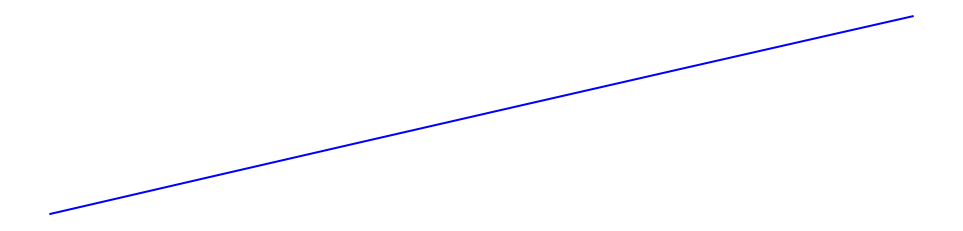

In [419]:
line = new_lines[0]
line = [line[i] for i in range(162449, 165449)]
line = np.array(line)
T = [t for t in range(len(line))]
T = np.array(T)

f = plt.figure()
f.set_figwidth(17)
f.set_figheight(4)

plt.plot(T, line, 'blue', linewidth=2)

plt.axis('off')
plt.show()

Ok. That's working.

In [420]:
tonic_freq = 110.0

new_velocities = []
for line_number in range(4):
    L = Q[line_number]

    new_signal = []
    next_marker = 1
    for i in tqdm(range(sample_count)):
        sample_float = intrp_smpl_rate * i

        if sample_float > next_marker:
            next_marker = next_marker + 1

        if next_marker < len(L):
            this_marker = next_marker - 1
            position = [L[this_marker], L[next_marker]]

            def intrp_func(t):
                output = position[0]+(position[1]-position[0])*(sample_float-this_marker)
                return output

            intrp_pos = intrp_func(sample_float)
            freq = tonic_freq * 2**intrp_pos
            new_signal.append(freq)
    new_velocities.append(new_signal)

100%|██████████| 4410000/4410000 [00:05<00:00, 810360.51it/s]


In [421]:
def Fourier_on_t(tonic: float,
                 sin_coeffs: list,
                 cos_coeffs: list,
                 t: float):

    assert type(tonic) == float
    assert type(sin_coeffs) == list
    assert type(cos_coeffs) == list
    assert type(t) == float
    
    wav_amplitude = np.iinfo(np.int32).max
    
    arg = tonic * t

    value = 0.0
    for a in sin_coeffs:
        multiplier = sin_coeffs.index(a)+1
        sin_term = a(t) * np.sin(2 * np.pi * multiplier * arg)
        value = value + sin_term
    for b in cos_coeffs:
        multiplier = cos_coeffs.index(b)+1
        cos_term = b(t) * np.cos(2 * np.pi * multiplier * arg)
        value = value + cos_term
        
    value = wav_amplitude * value
        
    return value

**REMEMBER TO CHANGE `file_name`!!!** **REMEMBER TO CHANGE `file_name`!!!** **REMEMBER TO CHANGE `file_name`!!!**

**REMEMBER TO CHANGE `file_name`!!!** **REMEMBER TO CHANGE `file_name`!!!** **REMEMBER TO CHANGE `file_name`!!!**

**REMEMBER TO CHANGE `file_name`!!!** **REMEMBER TO CHANGE `file_name`!!!** **REMEMBER TO CHANGE `file_name`!!!**

In [422]:
tonic_freq = 1.0

wav_amplitude = np.iinfo(np.int32).max

osc = 10


for k in range(len(new_lines)):
    file_name = 'Song_ZZZ_00{}'.format(k)
    
    freq_line = new_lines[k]
    velocity_line = new_velocities[k]
    length = len(line)
    
    for n in range(1, 24):
        m = random.randint(2, 11)
        fractions = [4/3, 3/4, 5/4, 6/5, 9/4, 3/2, 5/2]
        M = random.choice(fractions)
        fractions.remove(M)
        N = random.choice(fractions)

        Z = [0.1, 0.2, 1, 1.5, 2, 3]
        val = n**(1/5)
        lav = random.choice(Z) * n**((40+m)/50)

        globals()['a_{}'.format(n)] = lambda t: (1/lav) * ((1 + 0.5 * np.sin(2*np.pi * ((val*M*osc+m)/60) * t)) + (1/2) * (1 + 0.5 * np.sin(2*np.pi * ((val*N*osc+m)/60) * t)))
    
    F = []
    for i in tqdm(range(len(freq_line)-200000)):
        t = i * (1/sample_rate)
        freq = float(freq_line[i])
        physical_vel = abs(float(velocity_line[i]))
        value =  Fourier_on_t(tonic_freq, [a_1,
                        a_2,
                        a_3,
                        a_4,
                        a_5,
                        a_6,
                        a_7,
                        a_8,
                        a_9,
                        a_10,
                        a_11,
                        a_12,
                        a_13,
                        a_14,
                        a_15,
                        a_16,
                        a_17,
                        a_18,
                        a_19,
                        a_20,
                        a_21,
                        a_22,
                        a_23], [], freq * t)
        value = physical_vel * value
        F.append(value)
    
    F = np.array(F)
    max_amp = np.amax(np.absolute(F))
    F = F/max_amp
    F = wav_amplitude * F
    
    
    
    #for a in sin_coeffs:
    write('{}.wav'.format(file_name), sample_rate, F.astype(np.int32))
    
    print(color.BOLD + color.BLUE + 'Fourier series printed as \"' + color.END, '{}.wav'.format(file_name), color.BOLD + color.BLUE + '\".' + color.END)


  0%|          | 1382/4209449 [00:00<05:04, 13815.96it/s]

Fourier series printed as " Song_ZZZ_000.wav ".


  0%|          | 2779/4209449 [00:00<05:02, 13923.56it/s]

Fourier series printed as " Song_ZZZ_001.wav ".


  0%|          | 1382/4209449 [00:00<05:04, 13816.39it/s]

Fourier series printed as " Song_ZZZ_002.wav ".


100%|██████████| 4209449/4209449 [05:00<00:00, 14022.89it/s]


Fourier series printed as " Song_ZZZ_003.wav ".


### Exploring basic Fourier coefficient patterns.